In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\admin\Documents\PYTHON\MCI-Python\L9 - Final Project-20250701T120732Z-1-001\L9 - Final Project\data\transaction_data.csv')

In [3]:
df.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                  WHITE METAL LANTERN         6   
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoice_date  unit_price  cust_id         country  
0  2010-12-01 08:26:00        2.55  17850.0  United Kingdom  
1  2010-12-01 08:26:00        3.39  17850.0  United Kingdom  
2  2010-12-01 08:26:00        2.75  17850.0  United Kingdom  
3  2010-12-01 08:26:00        3.39  17850.0  United Kingdom  
4  2010-12-01 08:26:00        3.39  17850.0  United Kingdom

In [4]:
df.isna().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

# I - DATA CLEANING


1. Hi·ªán trong DataFrame c√≥ 2 c·ªôt  ***'cust_id'*** v√† ***'description'*** ch·ª©a c√°c gi√° tr·ªã NULL

In [5]:
df.isna().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

Xo√° b·ªè c√°c b·∫£n ghi ch·ª©a gi√° tr·ªã 'description' v√† 'cust_id' NULL

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

**2. Check datatype and correcting column datatype**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389168 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   389168 non-null  object 
 1   stock_code    389168 non-null  object 
 2   description   389168 non-null  object 
 3   quantity      389168 non-null  int64  
 4   invoice_date  389168 non-null  object 
 5   unit_price    389168 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       389168 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.7+ MB


In [9]:
df.head(2)

invoice_num stock_code                         description  quantity  \
0      536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                 WHITE METAL LANTERN         6   

          invoice_date  unit_price  cust_id         country  
0  2010-12-01 08:26:00        2.55  17850.0  United Kingdom  
1  2010-12-01 08:26:00        3.39  17850.0  United Kingdom

In [10]:
df['cust_id'] = df['cust_id'].astype('float').astype('int').astype('str')

In [11]:
df['invoice_date']=pd.to_datetime(df['invoice_date'])

In [12]:
df['quantity'] = df['quantity'] .apply(abs)

In [13]:
df['amount'] = df['quantity']*df['unit_price']

**3. Extracting time information**

In [14]:
df.head(2)

invoice_num stock_code                         description  quantity  \
0      536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                 WHITE METAL LANTERN         6   

         invoice_date  unit_price cust_id         country  amount  
0 2010-12-01 08:26:00        2.55   17850  United Kingdom   15.30  
1 2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34

In [15]:
df['day'] = df['invoice_date'].dt.day

In [16]:
df['month'] = df['invoice_date'].dt.month

In [17]:
df['hour'] = df['invoice_date'].dt.hour

In [18]:
df['Year_Month'] = df['invoice_date'].dt.strftime('%Y-%m')

In [19]:
df['week_days'] = df['invoice_date'].dt.strftime('%a')

In [20]:
df.head(2)

invoice_num stock_code                         description  quantity  \
0      536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                 WHITE METAL LANTERN         6   

         invoice_date  unit_price cust_id         country  amount  day  month  \
0 2010-12-01 08:26:00        2.55   17850  United Kingdom   15.30    1     12   
1 2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1     12   

   hour Year_Month week_days  
0     8    2010-12       Wed  
1     8    2010-12       Wed

# III - Exploratory Data Analysis (EDA)

In [21]:
df.head(2)

invoice_num stock_code                         description  quantity  \
0      536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                 WHITE METAL LANTERN         6   

         invoice_date  unit_price cust_id         country  amount  day  month  \
0 2010-12-01 08:26:00        2.55   17850  United Kingdom   15.30    1     12   
1 2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1     12   

   hour Year_Month week_days  
0     8    2010-12       Wed  
1     8    2010-12       Wed

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1. How many monthly active user (MAU) each month?**

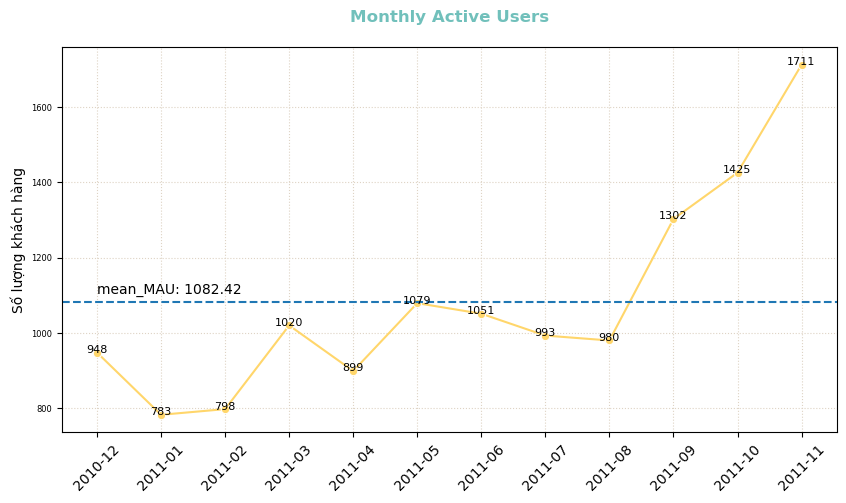

In [36]:
dfplot = df.groupby('Year_Month')['cust_id'].nunique().reset_index()
mean_MAU = dfplot['cust_id'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(
    data = dfplot,
    x = 'Year_Month',
    y = 'cust_id',
    color = "#FFD66B",
    marker = 'o'
)
plt.xticks
plt.xlabel('Year-Month')
plt.ylabel('S·ªë l∆∞·ª£ng kh√°ch h√†ng')
plt.title('Monthly Active Users\n', weight='bold', color = '#71C0BB')
#plt.tight_layout()
plt.grid (True, ls = ':', color = '#DED3C4')
plt.yticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.axhline(y = mean_MAU,linestyle='--')
plt.text(x=0, y = mean_MAU*1.02, s=f'mean_MAU: {round(mean_MAU, 2)}')

plt.xlabel('')
for r in dfplot.iterrows():
    text_x = r[1]['Year_Month']
    text_y = r[1]['cust_id']
    plt.text(
    x=text_x,
    y=text_y +0.08,
    s=round(text_y,2),
    ha='center',
    fontsize = 8
)
plt.show()

**2. How are the number of orders and total order amount each month?**

In [24]:
df.head(2)

invoice_num stock_code                         description  quantity  \
0      536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                 WHITE METAL LANTERN         6   

         invoice_date  unit_price cust_id         country  amount  day  month  \
0 2010-12-01 08:26:00        2.55   17850  United Kingdom   15.30    1     12   
1 2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1     12   

   hour Year_Month week_days  
0     8    2010-12       Wed  
1     8    2010-12       Wed

In [25]:
dfplot=df.groupby('Year_Month').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot

Year_Month  n_order  total_amount
0     2010-12     1708    590823.760
1     2011-01     1236    663815.700
2     2011-02     1202    457728.550
3     2011-03     1619    611036.910
4     2011-04     1384    512352.871
5     2011-05     1849    708938.040
6     2011-06     1707    714414.220
7     2011-07     1593    625943.541
8     2011-08     1544    674319.800
9     2011-09     2078    974236.392
10    2011-10     2263   1104033.990
11    2011-11     3086   1191227.020

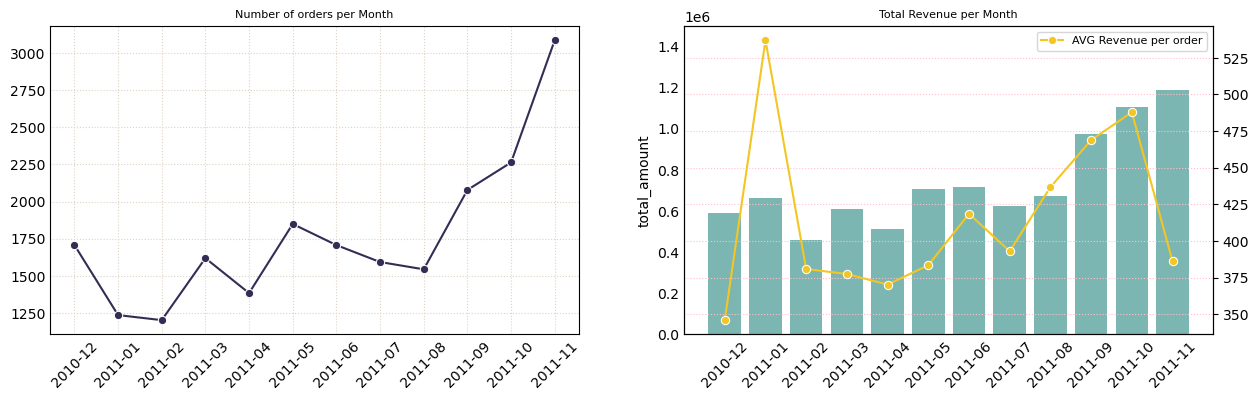

In [26]:
dfplot=df.groupby('Year_Month').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot['avg_amount_per_order'] = dfplot['total_amount']/dfplot['n_order']
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(
    data = dfplot,
    x= 'Year_Month',
    y = 'n_order',
    color = '#332D56',
    marker = 'o'
)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.grid (True, ls = ':', color = '#DED3C4')
plt.title('Number of orders per Month', fontsize = 8)
plt.tick_params(axis='both', which='both', length=0)

plt.subplot(1,2,2)
sns.barplot(
    data=dfplot,
    x = 'Year_Month',
    y = 'total_amount',
    color='#71C0BB'
)
plt.xticks(rotation = 45)
plt.xlabel('')
#plt.axhline(dfplot['total_amount'].mean(), color = "#67608A")
plt.title('Total Revenue per Month', fontsize = 8)
#plt.axhline(dfplot['total_amount']/dfplot['n_order'])
plt.tick_params(axis='both', which='both', length=0)
plt.ylim(0, 1.5e6)
plt.twinx()

sns.lineplot(
    data = dfplot,
    x = 'Year_Month',
    y = 'avg_amount_per_order',
    color= '#F3C623',
    label='AVG Revenue per order',
    marker = 'o'
)
plt.ylabel('')
plt.legend(fontsize=8) 
plt.grid(True, ls =':', color = 'pink')
plt.show()

**Nh·∫≠n x√©t**: 
1) **S·ªë l∆∞·ª£ng ƒë∆°n h√†ng:**
- L√† m·ªôt doanh nghi·ªáp chuy√™n v·ªÅ qu√† t·∫∑ng, c√¥ng ty c√≥ m√πa cao ƒëi·ªÉm v√†o nh·ªØng th√°ng cu·ªëi nƒÉm ‚Äî th·ªùi ƒëi·ªÉm t·∫≠p trung nhi·ªÅu d·ªãp l·ªÖ t·∫∑ng qu√† nh∆∞ Gi√°ng sinh, NƒÉm m·ªõi, ƒë·ªìng th·ªùi c≈©ng tr√πng v·ªõi c√°c ƒë·ª£t khuy·∫øn m√£i l·ªõn nh∆∞ Black Friday hay Cyber Monday.
- B√™n c·∫°nh ƒë√≥, do c√¥ng ty c√≥ nhi·ªÅu kh√°ch h√†ng l√† c√°c ƒë·∫°i l√Ω b√°n bu√¥n, n√™n h·ªç th∆∞·ªùng ch·ªß ƒë·ªông ƒë·∫∑t h√†ng t·ª´ s·ªõm ƒë·ªÉ chu·∫©n b·ªã ngu·ªìn h√†ng cho d·ªãp cao ƒëi·ªÉm, d·∫´n ƒë·∫øn s·ªë l∆∞·ª£ng ƒë∆°n h√†ng b·∫Øt ƒë·∫ßu tƒÉng m·∫°nh t·ª´ th√°ng 9 tr·ªü ƒëi.

2) **Doanh thu:**
- T·ªïng doanh thu kh√¥ng ch·ªâ ph·ª• thu·ªôc v√†o s·ªë l∆∞·ª£ng ƒë∆°n h√†ng, m√† c√≤n b·ªã ·∫£nh h∆∞·ªüng b·ªüi gi√° tr·ªã trung b√¨nh c·ªßa m·ªói ƒë∆°n.
Ch·∫≥ng h·∫°n, d√π th√°ng 1/2011 ghi nh·∫≠n s·ªë ƒë∆°n h√†ng r·∫•t th·∫•p (ch·ªâ cao h∆°n th√°ng 2/2011), nh∆∞ng doanh thu kh√¥ng qu√° th·∫•p ‚Äî do gi√° tr·ªã trung b√¨nh m·ªói ƒë∆°n h√†ng trong th√°ng n√†y ƒë·∫°t m·ª©c cao nh·∫•t trong nƒÉm.
- Ng∆∞·ª£c l·∫°i, th√°ng 11/2011 l√† th√°ng c√≥ doanh thu cao nh·∫•t, song gi√° tr·ªã trung b√¨nh tr√™n m·ªói ƒë∆°n h√†ng l·∫°i th·∫•p nh·∫•t. ƒêi·ªÅu n√†y c√≥ th·ªÉ l√Ω gi·∫£i b·ªüi c√¥ng ty ƒë√£ tri·ªÉn khai nhi·ªÅu ch∆∞∆°ng tr√¨nh khuy·∫øn m·∫°i trong giai ƒëo·∫°n n√†y ƒë·ªÉ th√∫c ƒë·∫©y doanh s·ªë.



3) **Khuy·∫øn ngh·ªã:**
- L√™n k·∫ø ho·∫°ch nh·∫≠p h√†ng v√† chu·∫©n b·ªã ngu·ªìn l·ª±c t·ª´ s·ªõm (b·∫Øt ƒë·∫ßu t·ª´ th√°ng 8‚Äì9) ƒë·ªÉ ƒë√°p ·ª©ng nhu c·∫ßu tƒÉng cao trong m√πa cao ƒëi·ªÉm cu·ªëi nƒÉm. ƒê·∫∑c bi·ªát ch√∫ tr·ªçng ph·ª•c v·ª• nh√≥m kh√°ch h√†ng l√† ƒë·∫°i l√Ω, v·ªën c√≥ xu h∆∞·ªõng ƒë·∫∑t h√†ng s·ªõm ƒë·ªÉ d·ª± tr·ªØ.
- Tri·ªÉn khai c√°c ch∆∞∆°ng tr√¨nh khuy·∫øn m√£i c√≥ chi·∫øn l∆∞·ª£c r√µ r√†ng: M·∫∑c d√π c√°c ch∆∞∆°ng tr√¨nh gi·∫£m gi√° trong th√°ng 11 gi√∫p th√∫c ƒë·∫©y s·ªë l∆∞·ª£ng ƒë∆°n h√†ng, nh∆∞ng k√©o theo ƒë√≥ l√† gi√° tr·ªã trung b√¨nh ƒë∆°n h√†ng gi·∫£m. Do ƒë√≥, n√™n c√¢n nh·∫Øc k·∫øt h·ª£p c√°c h√¨nh th·ª©c khuy·∫øn m√£i th√¥ng minh nh∆∞: gi·∫£m gi√° theo gi√° tr·ªã ƒë∆°n, t·∫∑ng k√®m qu√†, mua nhi·ªÅu gi·∫£m s√¢u... ƒë·ªÉ v·ª´a k√≠ch c·∫ßu, v·ª´a duy tr√¨ doanh thu tr√™n m·ªói ƒë∆°n h√†ng.
- T·∫≠n d·ª•ng hi·ªáu qu·∫£ giai ƒëo·∫°n th√°ng 1: ƒê√¢y l√† th·ªùi ƒëi·ªÉm m√† kh√°ch h√†ng c√≥ xu h∆∞·ªõng mua c√°c ƒë∆°n h√†ng gi√° tr·ªã cao d√π s·ªë l∆∞·ª£ng ƒë∆°n gi·∫£m. Doanh nghi·ªáp c√≥ th·ªÉ x√¢y d·ª±ng c√°c chi·∫øn d·ªãch ‚Äúqu√† T·∫øt √Çm l·ªãch‚Äù, ‚Äúnew year reset‚Äù ho·∫∑c "thank-you gift" d√†nh cho kh√°ch VIP, kh√°ch h√†ng trung th√†nh,... nh·∫±m duy tr√¨ doanh s·ªë ·ªïn ƒë·ªãnh sau m√πa cao ƒëi·ªÉm.


**3. Analyze the number of customers by weekdays and by hour**

In [27]:
cust_per_time = pd.pivot_table(
    data = df,
    index = 'week_days',
    columns = 'hour',
    values='cust_id',
    aggfunc='nunique'
)
cust_per_time=cust_per_time.loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
cust_per_time

hour         6    7      8      9      10     11     12     13     14     15  \
week_days                                                                      
Mon         NaN  4.0   78.0  225.0  286.0  315.0  407.0  402.0  338.0  293.0   
Tue         NaN  5.0  107.0  266.0  355.0  375.0  444.0  402.0  331.0  334.0   
Wed         NaN  4.0   98.0  286.0  363.0  351.0  467.0  414.0  362.0  353.0   
Thu        21.0  9.0   90.0  263.0  397.0  347.0  459.0  412.0  400.0  373.0   
Fri         NaN  8.0  112.0  250.0  350.0  307.0  379.0  347.0  297.0  252.0   
Sun         NaN  NaN    NaN    5.0  170.0  300.0  350.0  290.0  252.0  259.0   

hour          16     17     18     19    20  
week_days                                    
Mon        195.0  103.0   10.0    NaN   NaN  
Tue        185.0  130.0    3.0    NaN   NaN  
Wed        256.0   98.0    NaN    1.0   1.0  
Thu        288.0  266.0  188.0  151.0  22.0  
Fri        127.0   84.0    3.0    1.0   1.0  
Sun         89.0    NaN    NaN    NaN   NaN

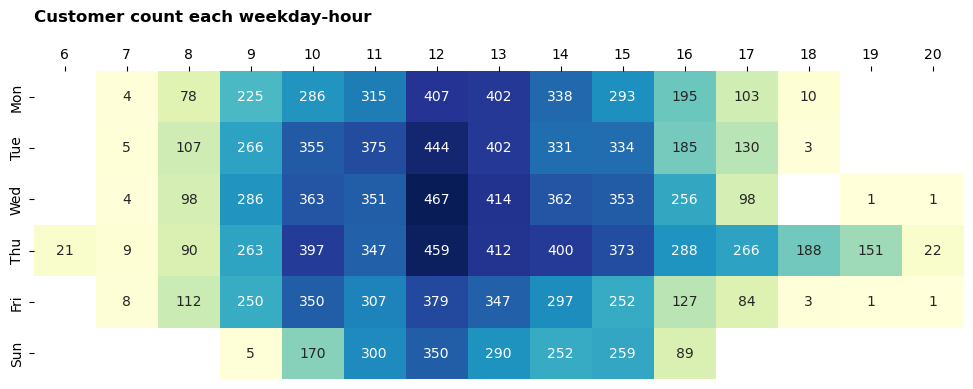

In [28]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    data=cust_per_time, 
    annot=True, 
    cbar=False,
    fmt='.0f',
    cmap = 'YlGnBu'
)
plt.xlabel(''), plt.ylabel('')
ax.xaxis.tick_top()
plt.title('Customer count each weekday-hour\n', loc='left', weight='bold')
plt.show()

In [29]:
dfplot4= df.groupby(['hour', 'cust_id'])['amount'].sum().reset_index()
dfplot4 = dfplot4.groupby('hour')['amount'].mean().reset_index()
dfplot4

hour       amount
0      6    24.088095
1      7  1036.970000
2      8   625.843565
3      9   691.718603
4     10   981.915957
5     11   798.488058
6     12   801.643264
7     13   718.209342
8     14   682.794429
9     15   720.332549
10    16   509.228244
11    17   403.500649
12    18   463.199100
13    19   335.883046
14    20   907.650000

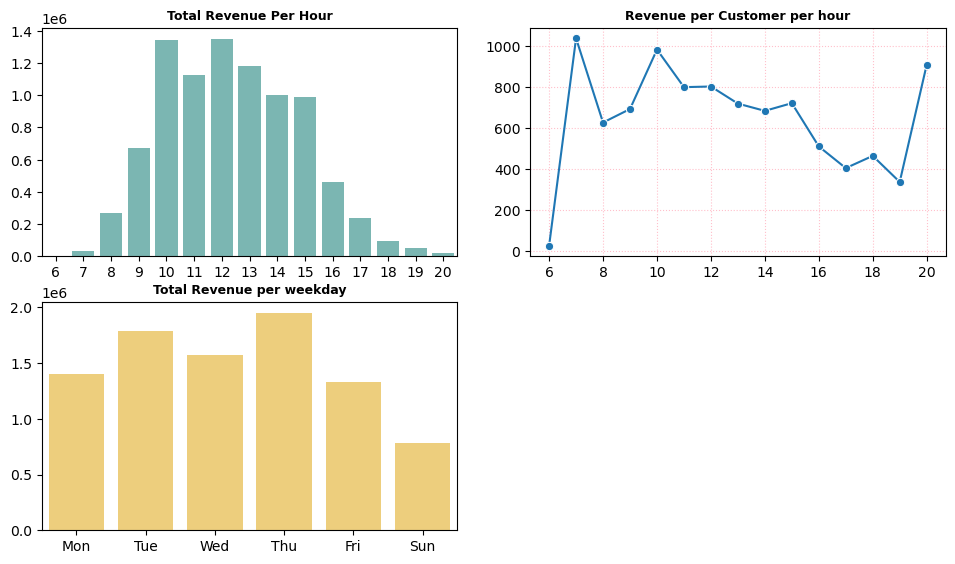

In [37]:
dfplot = df.groupby('week_days')['cust_id'].nunique().reset_index()
dfplot=dfplot.set_index('week_days').loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
dfplot1 = df.groupby('hour')['cust_id'].nunique().reset_index()
dfplot4= df.groupby(['hour', 'cust_id'])['amount'].sum().reset_index()
dfplot4 = dfplot4.groupby('hour')['amount'].mean().reset_index()
dfplot2 = df.groupby('hour')['amount'].sum().reset_index()
dfplot3=df.groupby('week_days')['amount'].sum().reset_index()
dfplot3 = dfplot3.set_index('week_days').loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]

plt.figure(figsize=(10,6))
revenuePerHour = df.groupby('hour')['amount'].sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(
    data=revenuePerHour,
    x='hour',
    y='amount',
    color='#71C0BB'
)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Revenue Per Hour', fontsize = 9, weight = 'bold')
#plt.ylim(0,3000)

plt.subplot(2,2,2)
dfplot4= df.groupby(['hour', 'cust_id'])['amount'].sum().reset_index()
dfplot4 = dfplot4.groupby('hour')['amount'].mean().reset_index()
sns.lineplot(
    data= dfplot4,
    x='hour',
    y='amount',
    marker = 'o'
)
plt.title('Revenue per Customer per hour', fontsize = 9, weight = 'bold')
plt.grid(True, ls=':', color = 'pink')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
revenuePerDay=df.groupby('week_days')['amount'].sum().reset_index()
revenuePerDay = revenuePerDay.set_index('week_days').loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
sns.barplot(
    data=revenuePerDay,
    x='week_days',
    y= 'amount',
    color= "#FFD66B",
)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Revenue per weekday', fontsize = 9, weight = 'bold')

plt.tight_layout(pad=2)
plt.subplots_adjust(hspace=0.2)


**Nh·∫≠n x√©t**: 

**1) Th√≥i quen mua s·∫Øm:**

**Theo khung gi·ªù trong ng√†y:**
- Kh√°ch h√†ng ho·∫°t ƒë·ªông m·∫°nh nh·∫•t t·ª´ 10h ƒë·∫øn 15h, cao ƒëi·ªÉm r∆°i v√†o 12h tr∆∞a ‚Äì th·ªùi gian ngh·ªâ tr∆∞a c·ªßa d√¢n vƒÉn ph√≤ng ho·∫∑c ng∆∞·ªùi l√†m vi·ªác t·ª± do.

- V·ªÅ doanh thu, c√°c khung gi·ªù t·ª´ 10h‚Äì13h c≈©ng ƒë·ªìng th·ªùi mang l·∫°i t·ªïng doanh thu cao nh·∫•t nh·ªù l∆∞·ª£ng kh√°ch ƒë√¥ng v√† gi√° tr·ªã chi ti√™u ·ªïn ƒë·ªãnh.

- ƒê√°ng ch√∫ √Ω: Khung gi·ªù 7h s√°ng v√† 20h t·ªëi c√≥ gi√° tr·ªã trung b√¨nh tr√™n m·ªói kh√°ch r·∫•t cao, nh∆∞ng s·ªë l∆∞·ª£ng kh√°ch l·∫°i r·∫•t th·∫•p (ch·ªâ ~24‚Äì30 ng∆∞·ªùi/gi·ªù). ƒêi·ªÅu n√†y cho th·∫•y:
C√≥ th·ªÉ l√† kh√°ch s·ªâ, kh√°ch trung th√†nh ho·∫∑c m·ªôt v√†i ƒë∆°n h√†ng ƒë·∫∑c bi·ªát l·ªõn khi·∫øn trung b√¨nh b·ªã ƒë·∫©y l√™n (outlier).

**Theo ng√†y trong tu·∫ßn:**
- Kh√°ch h√†ng c√≥ xu h∆∞·ªõng mua s·∫Øm nhi·ªÅu h∆°n v√†o c√°c ng√†y gi·ªØa tu·∫ßn (ƒë·∫∑c bi·ªát l√† Th·ª© 4 & Th·ª© 5), gi·∫£m v√†o cu·ªëi tu·∫ßn. C√≥ th·ªÉ v√¨ ·ªü c√¥ng ty th√¨ c√≤n nhi·ªÅu th·ªùi gian ‚Äúch·∫øt‚Äù ƒë·ªÉ l∆∞·ªõt web mua s·∫Øm, ch·ª© cu·ªëi tu·∫ßn v·ªÅ nh√† l√† b·∫≠n... ch∆°i ho·∫∑c ng·ªß =))

**2) Khuy·∫øn ngh·ªã:**
- T·∫≠p trung livestream b√°n h√†ng trong khung gi·ªù 11h30‚Äì13h30 v√† c√°c ng√†y gi·ªØa tu·∫ßn, khi kh√°ch h√†ng c√≥ xu h∆∞·ªõng mua s·∫Øm cao nh·∫•t.
- G·ª≠i email/th√¥ng b√°o ƒë·∫©y tr∆∞·ªõc gi·ªù tr∆∞a (9h30‚Äì10h) ƒë·ªÉ kh√°ch k·ªãp xem v√† ph·∫£n h·ªìi trong gi·ªù ngh·ªâ.
- Tri·ªÉn khai mini campaign ‚ÄúFlash sale gi·ªù tr∆∞a‚Äù ho·∫∑c "Deal v√†ng 7h s√°ng/20h t·ªëi" ƒë·ªÉ t·∫°o th√≥i quen truy c·∫≠p th∆∞·ªùng xuy√™n v√†o 1 khung gi·ªù c·ªë ƒë·ªãnh trong ng√†y
- T·ªëi ∆∞u chi ph√≠ qu·∫£ng c√°o b·∫±ng c√°ch ph√¢n b·ªï ng√¢n s√°ch theo khung gi·ªù hi·ªáu qu·∫£ nh∆∞: ∆∞u ti√™n khung gi·ªù 10h‚Äì14h c√°c ng√†y Th·ª© 3 ƒë·∫øn Th·ª© 5, h·∫°n ch·∫ø chi ti√™u v√†o bu·ªïi t·ªëi mu·ªôn v√† cu·ªëi tu·∫ßn.

**4. Top 10 Contries bring most sales for the company**

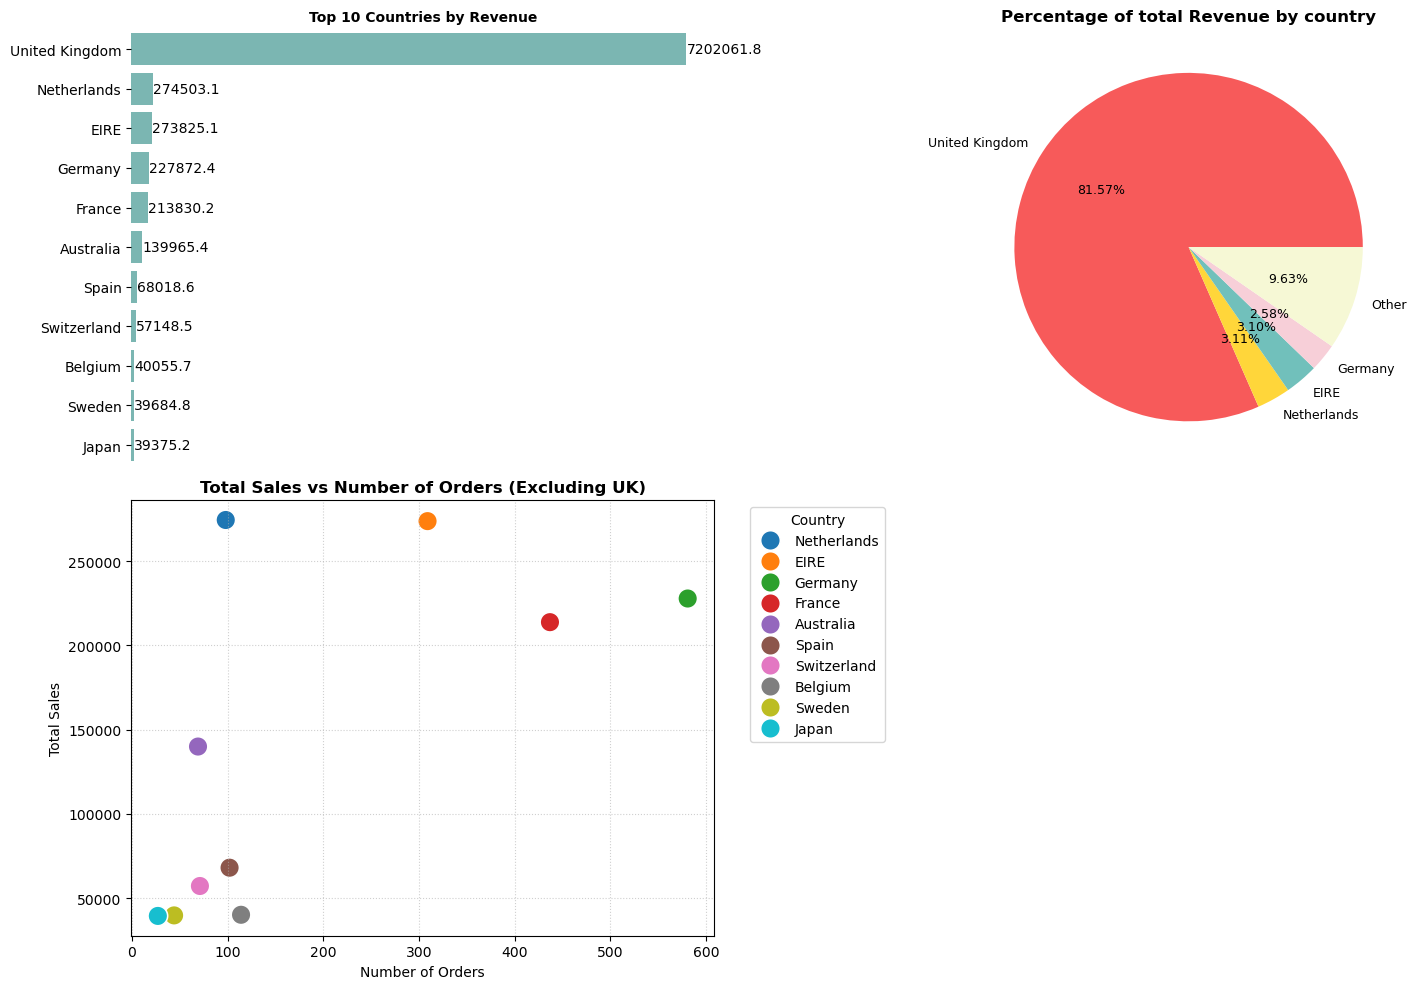

In [38]:
dfplot = df.groupby('country').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index().sort_values(by='total_amount', ascending=False).head(11)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax = sns.barplot(
    data = dfplot,
    x = 'total_amount',
    y = 'country',
    color='#71C0BB'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Countries by Revenue', fontsize =10, weight= 'bold')
plt.xticks([])
ax.set_frame_on(False)

plt.subplot(2,2,2)
dfplot1 = df.groupby('country')['amount'].sum().sort_values(ascending=False).reset_index()
top4 = dfplot1[:4]
others = dfplot1.loc[4:,'amount'].sum()
dfplot2 = pd.concat([top4, pd.DataFrame({'country': ['Other'], 'amount':[others]})], ignore_index=True)
plt.pie(
    x=dfplot2['amount'],
    labels = dfplot2['country'],
    autopct='%.2f%%',
    colors=['#F75A5A','#FFD63A','#71C0BB', '#F7CFD8', '#F6F8D5'],
    textprops={'fontsize': 9}
)
plt.title('Percentage of total Revenue by country', weight= 'bold')

plt.subplot(2,2,3)
dfplot3 = dfplot[dfplot['country'] != 'United Kingdom']
sns.scatterplot(
    data = dfplot3,
    x='n_order',
    y = 'total_amount',
    hue= 'country',
    palette='tab10',
    s=200
)
plt.title('Total Sales vs Number of Orders (Excluding UK)', fontsize=12, weight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Total Sales')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()

plt.show()


**Nh·∫≠n x√©t:**

**1) Th·ªã tr∆∞·ªùng ch·ªß l·ª±c:**
- Bi·ªÉu ƒë·ªì tr√≤n cho th·∫•y V∆∞∆°ng qu·ªëc Anh (UK) chi·∫øm t·ªõi 81,57% t·ªïng doanh thu, b·ªè xa c√°c qu·ªëc gia c√≤n l·∫°i. ƒêi·ªÅu n√†y cho th·∫•y c√¥ng ty hi·ªán ph·ª• thu·ªôc r·∫•t l·ªõn v√†o th·ªã tr∆∞·ªùng trong n∆∞·ªõc.
- B√™n c·∫°nh ƒë√≥, ngo√†i Nh·∫≠t B·∫£n, 9/10 qu·ªëc gia top doanh thu ƒë·ªÅu l√† c√°c n∆∞·ªõc ch√¢u √Çu ‚Üí hi·ªán c√¥ng ty ch∆∞a ƒëa d·∫°ng h√≥a th·ªã tr∆∞·ªùng v·ªÅ m·∫∑t ƒë·ªãa l√Ω.

**2) Th·ªã tr∆∞·ªùng "ch·ªãu chi':**

D√π kh√¥ng c√≥ s·ªë ƒë∆°n h√†ng trong Top 3, nh∆∞ng m·ªôt s·ªë qu·ªëc gia nh∆∞:
- Netherlands (H√† Lan), Ireland (EIRE) v·∫´n ƒë·∫°t doanh thu cao trong Top 3
- Australia ch·ªâ ƒë·ª©ng th·ª© 8 v·ªÅ s·ªë l∆∞·ª£ng ƒë∆°n nh∆∞ng l·∫°i ƒë·ª©ng th·ª© 6 v·ªÅ t·ªïng doanh thu.

üëâ ƒêi·ªÅu n√†y cho th·∫•y ƒë√¢y l√† nh·ªØng th·ªã tr∆∞·ªùng c√≥ gi√° tr·ªã ƒë∆°n h√†ng trung b√¨nh cao ‚Äì kh√°ch h√†ng c√≥ kh·∫£ nƒÉng chi ti√™u t·ªët.

**Khuy·∫øn ngh·ªã:**

**1) Gi·∫£m ph·ª• thu·ªôc v√†o UK:**

R·ªßi ro cao n·∫øu ch√≠nh s√°ch, h√†nh vi ti√™u d√πng t·∫°i UK thay ƒë·ªïi.

C·∫ßn t√¨m ki·∫øm v√† ph√°t tri·ªÉn th·ªã tr∆∞·ªùng m·ªõi t·∫°i ch√¢u √Å, ch√¢u M·ªπ, ...

**2) T·ªëi ∆∞u nh√≥m kh√°ch h√†ng gi√° tr·ªã cao:**

T·∫≠p trung v√†o c√°c th·ªã tr∆∞·ªùng nh∆∞ Netherlands, EIRE, Australia ‚Äì n∆°i m·ªói kh√°ch h√†ng mang l·∫°i gi√° tr·ªã cao, c√≥ th·ªÉ tri·ªÉn khai:

- Ch∆∞∆°ng tr√¨nh th√†nh vi√™n theo c·∫•p b·∫≠c

- ∆Øu ƒë√£i chi ti√™u l·ªõn

- Upsell/cross-sell d·ª±a tr√™n h√†nh vi

**3) M·ªü r·ªông th·ªã ph·∫ßn ·ªü ch√¢u l·ª•c kh√°c:**

Nh·∫≠t B·∫£n c√≥ th·ªÉ l√† b√†n ƒë·∫°p v√†o th·ªã tr∆∞·ªùng ch√¢u √Å.

Nghi√™n c·ª©u th√≥i quen ti√™u d√πng v√† ƒëi·ªÅu ch·ªânh s·∫£n ph·∫©m/d·ªãch v·ª• ph√π h·ª£p t·ª´ng v√πng.


**5. Countries with most AOV - Average Order Value:**

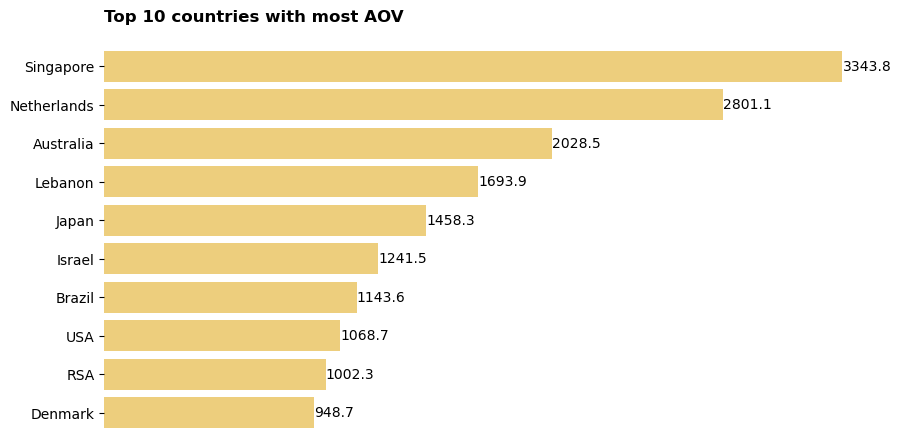

In [62]:
plt.figure(figsize=(10,5))
dfplot = df.groupby('country').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot['AOV'] = dfplot['total_amount']/dfplot['n_order']
top10_AOV = dfplot.sort_values(by='AOV', ascending=False).head(10)
ax = sns.barplot(
    data= top10_AOV,
    x='AOV',
    y= 'country',
    color = '#FFD66B'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('Top 10 countries with most AOV\n', loc='left', weight='bold')
plt.xlabel('')
plt.show()

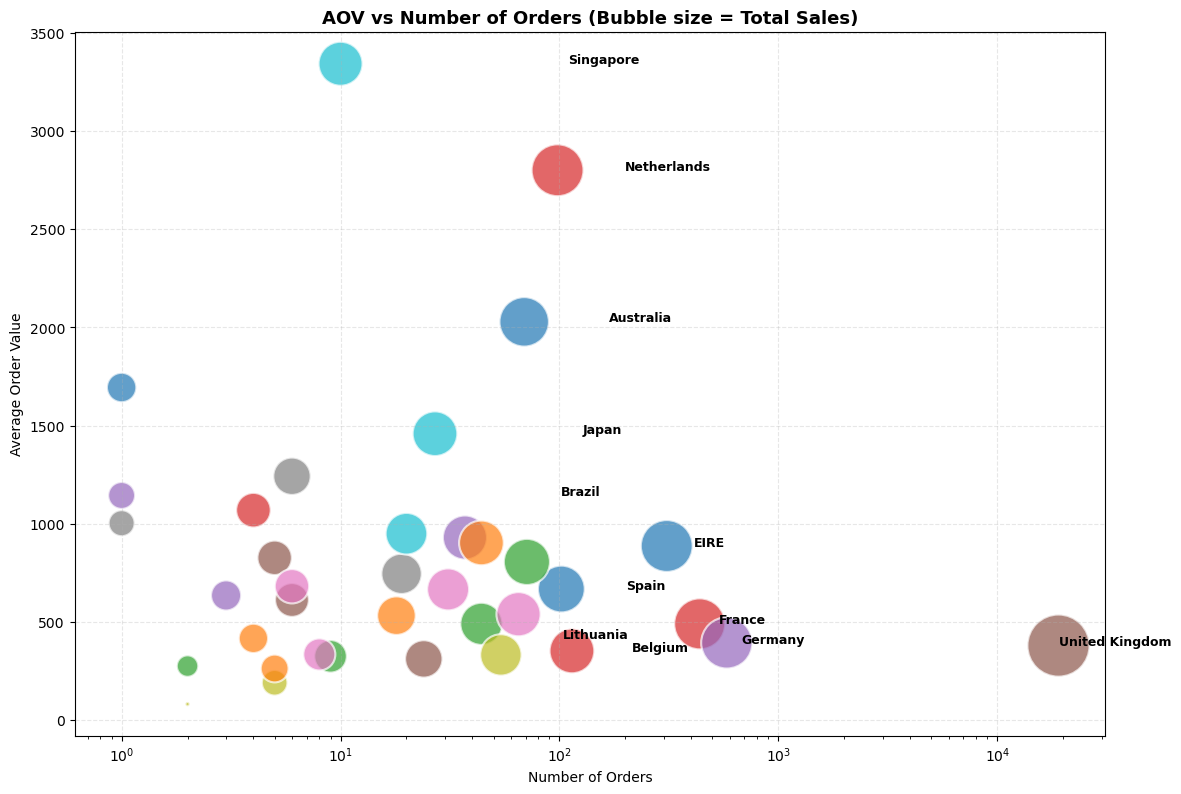

In [41]:
dfplot = df.groupby('country').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot['AOV'] = dfplot['total_amount']/dfplot['n_order']
top10_AOV = dfplot.sort_values(by='AOV', ascending=False).reset_index(drop=True).head(10)

import numpy as np

dfplot['log_amount'] = np.log(dfplot['total_amount'])

plt.figure(figsize=(12,8))

sns.scatterplot(
    data=dfplot,
    x='n_order',
    y='AOV',
    size='log_amount',
    hue='country',
    sizes=(10, 2000),
    alpha=0.7,
    palette='tab10',
    legend=False
)
highlight = ['United Kingdom','Australia', 'Germany', 'France','EIRE','Spain','Singapore', 'Netherlands', 'Japan', 'Ireland', 'Belgium','Brazil','Lithuania']

for i in range(len(dfplot)):
    country = dfplot.loc[i, 'country']
    if country in highlight:
        plt.text(
            dfplot.loc[i, 'n_order'] + 100,  # d·ªãch sang ph·∫£i cho kh·ªèi ƒë√®
            dfplot.loc[i, 'AOV'],
            country,
            fontsize=9,
            weight='bold'
        )
plt.title('AOV vs Number of Orders (Bubble size = Total Sales)', fontsize=13, weight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Average Order Value')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.xscale('log')
plt.show()

In [42]:
dfplot = df.groupby(['country','description'])['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

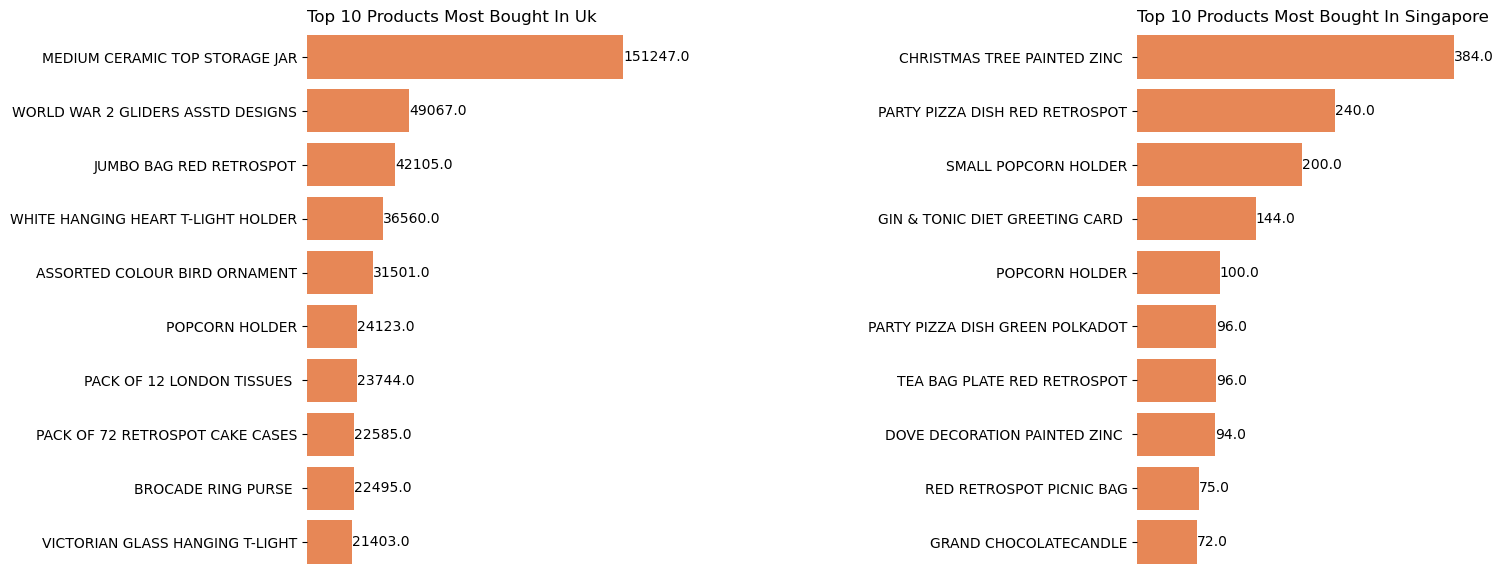

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(121)
# Plot top products for UK:
dfplot_uk = dfplot[dfplot['country'] == 'United Kingdom'].head(10)

ax = sns.barplot(
    data = dfplot_uk,
    y = 'description',
    x = 'quantity',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 products most bought in UK'.title(), loc='left')
plt.xlabel('')         

plt.subplot(122)
# Plot top products for Singapore:
dfplot_sing = dfplot[dfplot['country'] == 'Singapore'].head(10)

ax = sns.barplot(
    data = dfplot_sing,
    y = 'description',
    x = 'quantity',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 products most bought in Singapore'.title(), loc='left')
plt.xlabel('')
plt.subplots_adjust(wspace=1.5)
plt.show()

**Nh·∫≠n x√©t:**
- WOW!: Nhi·ªÅu qu·ªëc gia c√≥ doanh thu cao nh·∫•t l·∫°i kh√¥ng n·∫±m trong Top 10 qu·ªëc gia c√≥ AOV (gi√° tr·ªã trung b√¨nh m·ªói ƒë∆°n h√†ng) cao nh·∫•t. ƒê·∫∑c bi·ªát, United Kingdom ‚Äì th·ªã tr∆∞·ªùng l·ªõn nh·∫•t v·ªÅ doanh thu v√† s·ªë l∆∞·ª£ng ƒë∆°n ‚Äì l·∫°i x·∫øp g·∫ßn cu·ªëi b·∫£ng v·ªÅ AOV, cho th·∫•y kh√°ch h√†ng ·ªü ƒë√¢y c√≥ xu h∆∞·ªõng mua ƒë∆°n h√†ng nh·ªè, nh∆∞ng mua r·∫•t nhi·ªÅu.

- Ng∆∞·ª£c l·∫°i, nh·ªØng th·ªã tr∆∞·ªùng nh∆∞ Singapore, Japan, Netherlands, Australia n·ªïi b·∫≠t v·ªõi AOV cao, d√π s·ªë l∆∞·ª£ng ƒë∆°n v√† t·ªïng doanh thu kh√¥ng thu·ªôc nh√≥m d·∫´n ƒë·∫ßu. ƒêi·ªÅu n√†y cho th·∫•y kh√°ch h√†ng ·ªü c√°c th·ªã tr∆∞·ªùng n√†y c√≥ xu h∆∞·ªõng chi ti√™u l·ªõn cho m·ªói ƒë∆°n h√†ng, th·ªÉ hi·ªán ti·ªÅm nƒÉng cao n·∫øu ƒë∆∞·ª£c khai th√°c ƒë√∫ng c√°ch.

- M·ªôt gi·∫£ thuy·∫øt h·ª£p l√Ω l√†: c√°c th·ªã tr∆∞·ªùng nh∆∞ UK ƒë√£ c√≥ t·ªáp kh√°ch h√†ng trung th√†nh, n√™n h·ªç nh·∫≠n ƒë∆∞·ª£c nhi·ªÅu ∆∞u ƒë√£i/khuy·∫øn m√£i, Do ƒë√≥, h·ªç th∆∞·ªùng √°p d·ª•ng c√°c m√£ gi·∫£m gi√°, voucher, ho·∫∑c ch∆∞∆°ng tr√¨nh t√≠ch ƒëi·ªÉm, khi·∫øn gi√° tr·ªã trung b√¨nh m·ªói ƒë∆°n h√†ng (AOV) gi·∫£m xu·ªëng, m·∫∑c d√π t·ªïng s·ªë ƒë∆°n h√†ng r·∫•t l·ªõn.
- B√™n c·∫°nh ƒë√≥, ch√∫ng ta c√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c nh·ªØng s·∫£n ph·∫©m ƒë∆∞·ª£c sƒÉn ƒë√≥n nh·∫•t ·ªü 2 th·ªã tr∆∞·ªùng United Kingdom v√† Singapore ƒë·ªÉ x√¢y d·ª±ng chi·∫øn l∆∞·ª£c ph√¢n b·ªë s·∫£n ph·∫©m theo insight t·ª´ng khu v·ª±c h·ª£p l√Ω nh·∫•t

**Khuy·∫øn ngh·ªã:**

**1) M·ªü r·ªông sang c√°c th·ªã tr∆∞·ªùng c√≥ AOV cao**

C√°c qu·ªëc gia nh∆∞ Singapore, Brazil, Lithuania, Japan tuy c√≥ l∆∞·ª£ng ƒë∆°n khi√™m t·ªën nh∆∞ng l·∫°i c√≥ kh√°ch h√†ng ch·ªãu chi. ƒê√¢y l√† nh·ªØng th·ªã tr∆∞·ªùng ti·ªÅm nƒÉng ƒë·ªÉ m·ªü r·ªông chi·∫øn d·ªãch ti·∫øp th·ªã, c·∫£i thi·ªán ƒë·ªô nh·∫≠n di·ªán th∆∞∆°ng hi·ªáu v√† ƒë·∫©y s·ªë ƒë∆°n.

**2) T·ªëi ∆∞u chi·∫øn l∆∞·ª£c ·ªü th·ªã tr∆∞·ªùng l·ªõn**

V·ªõi c√°c th·ªã tr∆∞·ªùng nh∆∞ UK, France, Germany ‚Äî n∆°i c√≥ l∆∞·ª£ng ƒë∆°n h√†ng l·ªõn nh∆∞ng AOV th·∫•p ‚Äî c√≥ th·ªÉ:

TƒÉng gi√° tr·ªã m·ªói ƒë∆°n h√†ng b·∫±ng c√°ch tung ∆∞u ƒë√£i theo ng∆∞·ª°ng chi ti√™u (VD: ƒë∆°n tr√™n 1 tri·ªáu ƒë∆∞·ª£c t·∫∑ng voucher ho·∫∑c freeship).

Upsell / Cross-sell: g·ª£i √Ω s·∫£n ph·∫©m ƒëi k√®m, combo, ho·∫∑c g√≥i th√†nh b·ªô.

**3) T√πy bi·∫øn chi·∫øn l∆∞·ª£c theo h√†nh vi t·ª´ng qu·ªëc gia**

S·ª± ch√™nh l·ªách gi·ªØa l∆∞·ª£ng ƒë∆°n v√† AOV cho th·∫•y kh√¥ng n√™n √°p d·ª•ng m·ªôt chi·∫øn l∆∞·ª£c b√°n h√†ng chung cho t·∫•t c·∫£ th·ªã tr∆∞·ªùng. N√™n:

Ph√¢n kh√∫c kh√°ch h√†ng theo t·ª´ng qu·ªëc gia

T·ªëi ∆∞u n·ªôi dung, k√™nh v√† ∆∞u ƒë√£i ph√π h·ª£p v·ªõi h√†nh vi ti√™u d√πng ƒë·ªãa ph∆∞∆°ng.

**6. Number of New vs Returning Customers by Month**

In [44]:
first_order = df.groupby('cust_id').agg(
     first_order = ('invoice_date', 'min')
 ).reset_index()
dfplot = df.merge(first_order, on = 'cust_id', how = 'left')
dfplot.head(3)

invoice_num stock_code                         description  quantity  \
0      536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                 WHITE METAL LANTERN         6   
2      536365     84406B      CREAM CUPID HEARTS COAT HANGER         8   

         invoice_date  unit_price cust_id         country  amount  day  month  \
0 2010-12-01 08:26:00        2.55   17850  United Kingdom   15.30    1     12   
1 2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1     12   
2 2010-12-01 08:26:00        2.75   17850  United Kingdom   22.00    1     12   

   hour Year_Month week_days         first_order  
0     8    2010-12       Wed 2010-12-01 08:26:00  
1     8    2010-12       Wed 2010-12-01 08:26:00  
2     8    2010-12       Wed 2010-12-01 08:26:00

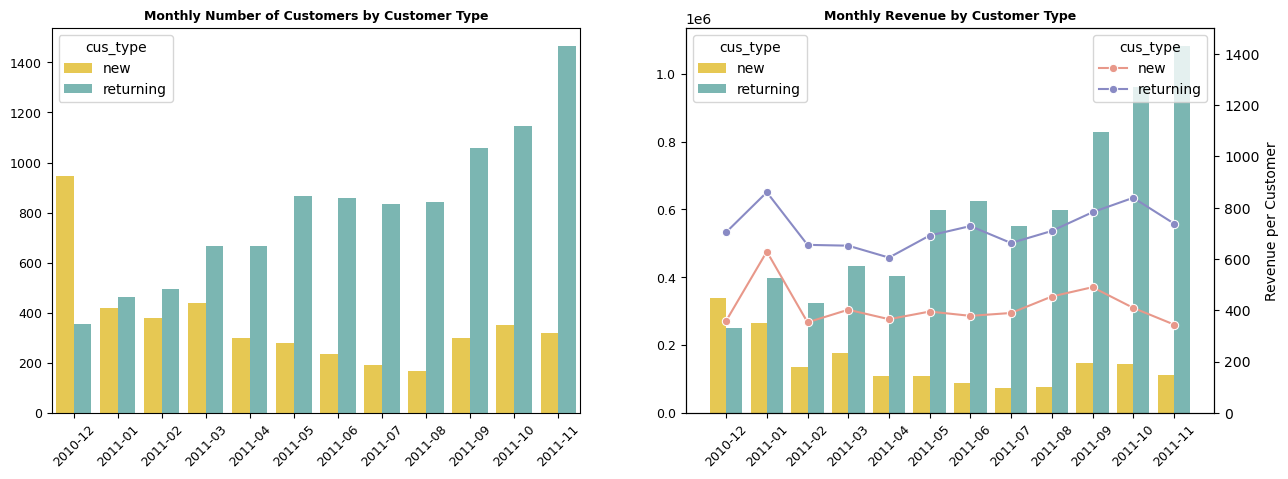

In [45]:
dfplot['cus_type'] = dfplot.apply(
    lambda row: 'new' if row['invoice_date'] == row['first_order'] else 'returning', axis = 1
)
dfplot1 = dfplot.groupby(['Year_Month', 'cus_type']).agg(
    total_customer = ('cust_id', 'nunique'),
    total_amount = ('amount', 'sum')
).reset_index()
dfplot1['Revenue_per_cus'] = dfplot1['total_amount']/dfplot1['total_customer']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(
    data = dfplot1,
    x = 'Year_Month',
    y= 'total_customer',
    hue = 'cus_type',
    palette=['#FFD63A','#71C0BB']
)
plt.xticks(rotation = 45)
plt.title('Monthly Number of Customers by Customer Type', fontsize = 9, weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9)

plt.subplot(1,2,2)
sns.barplot(
    data = dfplot1,
    x = 'Year_Month',
    y = 'total_amount',
    hue = 'cus_type',
    palette=['#FFD63A','#71C0BB']
)
plt.xticks(rotation = 45)
plt.title('Monthly Revenue by Customer Type', fontsize = 9, weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9)
plt.twinx()

sns.lineplot(
    data = dfplot1,
    x = 'Year_Month',
    y = 'Revenue_per_cus',
    hue= 'cus_type',
    palette=['#E8988A', '#898AC4'],
    marker = 'o'
)
plt.ylim(0,1500)
plt.ylabel('Revenue per Customer')
plt.show()

**Nh·∫≠n x√©t:**
- Doanh thu v√† s·ªë l∆∞·ª£ng kh√°ch h√†ng ch·ªß y·∫øu v·∫´n ƒë·∫øn t·ª´ kh√°ch h√†ng c≈©, cho th·∫•y c√¥ng ty ƒë√£ x√¢y d·ª±ng ƒë∆∞·ª£c m·ªôt t·ªáp kh√°ch h√†ng trung th√†nh ·ªïn ƒë·ªãnh, ph·∫£n √°nh s·ª± h√†i l√≤ng v·ªÅ ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m, d·ªãch v·ª• v√† gi√° c·∫£.

- Th√°ng 1/2011 ghi nh·∫≠n m·ª©c doanh thu trung b√¨nh tr√™n m·ªói kh√°ch h√†ng cao nh·∫•t ·ªü c·∫£ hai nh√≥m (m·ªõi v√† c≈©). ƒê√¢y l√† th·ªùi ƒëi·ªÉm T·∫øt D∆∞∆°ng l·ªãch, khi nhu c·∫ßu mua s·∫Øm, bi·∫øu t·∫∑ng tƒÉng m·∫°nh ‚Äì kh√°ch h√†ng th∆∞·ªùng s·∫µn s√†ng chi ti√™u nhi·ªÅu h∆°n, th·ªÉ hi·ªán h√†nh vi ‚Äúch·ªãu chi‚Äù.

- Trong giai ƒëo·∫°n t·ª´ th√°ng 5 t·ªõi th√°ng 8, tuy doanh thu trung b√¨nh tr√™n m·ªói kh√°ch h√†ng m·ªõi c√≥ xu h∆∞·ªõng tƒÉng nh·∫π, nh∆∞ng t·ªïng doanh thu l·∫°i kh√¥ng tƒÉng t∆∞∆°ng ·ª©ng, c√≥ th·ªÉ do s·ªë l∆∞·ª£ng kh√°ch h√†ng m·ªõi s·ª•t gi·∫£m. ƒêi·ªÅu n√†y cho th·∫•y c√≥ th·ªÉ c√¥ng ty ch∆∞a tri·ªÉn khai ƒë·ªß c√°c ho·∫°t ƒë·ªông marketing thu h√∫t kh√°ch m·ªõi trong giai ƒëo·∫°n n√†y.

- Nh√¨n chung, h√†nh vi chi ti√™u gi·ªØa kh√°ch h√†ng m·ªõi v√† c≈© c√≥ xu h∆∞·ªõng t∆∞∆°ng ƒë·ªìng gi·ªØa c√°c th√°ng trong nƒÉm, tuy nhi√™n kh√°ch h√†ng c≈© v·∫´n ƒë√≥ng vai tr√≤ ch·ªß ƒë·∫°o v·ªÅ m·∫∑t doanh thu.

- T·ª∑ l·ªá kh√°ch h√†ng c≈© tƒÉng ƒë·ªÅu v√† ·ªïn ƒë·ªãnh l√† m·ªôt ƒëi·ªÉm m·∫°nh, th·ªÉ hi·ªán c√¥ng ty l√†m t·ªët trong vi·ªác gi·ªØ ch√¢n kh√°ch h√†ng, t·ª´ ƒë√≥ t·∫°o d√≤ng doanh thu b·ªÅn v·ªØng.

**Khuy·∫øn ngh·ªã:**
- C·∫ßn tƒÉng c∆∞·ªùng c√°c ho·∫°t ƒë·ªông ti·∫øp c·∫≠n v√† thu h√∫t kh√°ch h√†ng m·ªõi. V·ªõi vi·ªác t·ª∑ l·ªá kh√°ch h√†ng c≈© ƒëang tƒÉng ƒë·ªÅu v√† ·ªïn ƒë·ªãnh, ch·ª©ng t·ªè s·∫£n ph·∫©m, d·ªãch v·ª• v√† gi√° c·∫£ c·ªßa c√¥ng ty c√≥ l·ª£i th·∫ø c·∫°nh tranh r√µ r·ªát. V√¨ v·∫≠y, n·∫øu m·ªü r·ªông ƒë∆∞·ª£c t·ªáp kh√°ch h√†ng m·ªõi, c√¥ng ty c√≥ th·ªÉ chuy·ªÉn ƒë·ªïi h·ªç th√†nh kh√°ch h√†ng trung th√†nh ‚Äì t·ª´ ƒë√≥ ƒë·∫©y m·∫°nh tƒÉng tr∆∞·ªüng doanh thu m·ªôt c√°ch b·ªÅn v·ªØng.

- T·∫≠n d·ª•ng d·ªãp l·ªÖ T·∫øt (ƒë·∫∑c bi·ªát l√† th√°ng 1) ƒë·ªÉ tri·ªÉn khai c√°c ch∆∞∆°ng tr√¨nh combo qu√† t·∫∑ng, khuy·∫øn m√£i gi√° tr·ªã cao ho·∫∑c ƒë·∫©y s·∫£n ph·∫©m cao c·∫•p. ƒê√¢y l√† th·ªùi ƒëi·ªÉm kh√°ch h√†ng c√≥ xu h∆∞·ªõng chi ti√™u nhi·ªÅu h∆°n ‚Äì c∆° h·ªôi t·ªët ƒë·ªÉ tƒÉng AOV v√† CLV.

- Ti·∫øp t·ª•c duy tr√¨ v√† chƒÉm s√≥c kh√°ch h√†ng c≈© b·∫±ng c√°c ch∆∞∆°ng tr√¨nh tri √¢n, voucher ∆∞u ƒë√£i ƒë·ªãnh k·ª≥, khuy·∫øn m√£i sinh nh·∫≠t, ho·∫∑c h·ªá th·ªëng t√≠ch ƒëi·ªÉm ‚Äì nh·∫±m tƒÉng t·∫ßn su·∫•t mua v√† duy tr√¨ ƒë·ªô trung th√†nh.

- Tri·ªÉn khai c√°c ch∆∞∆°ng tr√¨nh k√≠ch th√≠ch chuy·ªÉn ƒë·ªïi l·∫ßn ƒë·∫ßu nh∆∞ ‚Äúgi·∫£m gi√° cho ƒë∆°n h√†ng ƒë·∫ßu ti√™n‚Äù, ‚Äúgi·ªõi thi·ªáu b·∫°n b√®‚Äù, ho·∫∑c c√°c g√≥i combo d√πng th·ª≠ cho kh√°ch m·ªõi.

- Theo d√µi s√°t h√†nh vi kh√°ch m·ªõi v√† t·ªâ l·ªá quay l·∫°i (retention) ƒë·ªÉ ƒë√°nh gi√° hi·ªáu qu·∫£ c√°c chi·∫øn d·ªãch, t·ª´ ƒë√≥ t·ªëi ∆∞u h√≥a chi·∫øn l∆∞·ª£c gi·ªØ ch√¢n kh√°ch h√†ng trong d√†i h·∫°n.




**7. Monthly Average Transaction Value of New Customers Acquired in December 2010**

In [46]:
new_cus_dec2010 = dfplot.loc[(dfplot['Year_Month']== '2010-12') & (dfplot['cus_type']== 'new')]['cust_id'].unique().tolist()

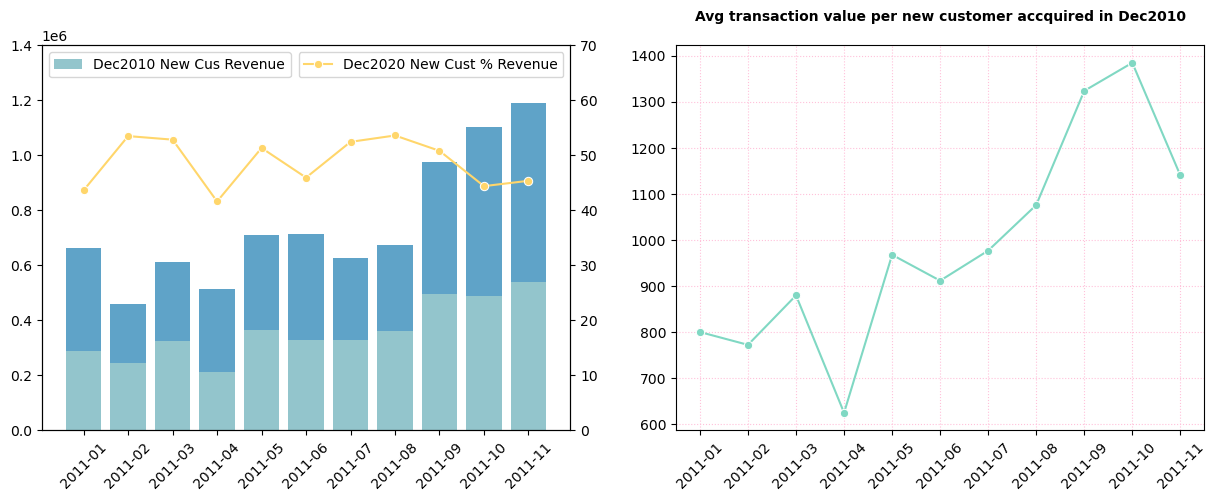

In [47]:
dfplot6 = dfplot.loc[dfplot['cust_id'].isin(new_cus_dec2010)].groupby('Year_Month').agg(
    total_customer = ('cust_id', 'nunique'),
    total_amount = ('amount', 'sum')
).reset_index()
dfplot6['AVG_trans_value'] = dfplot6['total_amount']/dfplot6['total_customer']
df_total = dfplot.groupby('Year_Month')['amount'].sum().reset_index()
dfplot7 = pd.merge(dfplot6, df_total, on ='Year_Month', how = 'left')[1:]
dfplot7['pct'] = round(dfplot7['total_amount']/dfplot7['amount']*100,2)
dfplot7

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(
    data = dfplot7,
    x ='Year_Month',
    y = 'amount',
    color = '#4DA8DA'
)
plt.ylim(0,1.4e6)
sns.barplot(
    data =dfplot7,
    x = 'Year_Month',
    y = 'total_amount',
    label='Dec2010 New Cus Revenue',  
    color = '#8ACCD5'
)
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.twinx()
sns.lineplot(
    data=dfplot7,
    x='Year_Month',
    y='pct',
    marker='o',
    label='Dec2020 New Cust % Revenue',
    color = '#FFD66B'
)
plt.ylim(0,70)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,2,2)
sns.lineplot(
    data = dfplot7,
    x ='Year_Month',
    y ='AVG_trans_value',
    color = '#80D8C3',
    marker = 'o'
)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.grid(True, ls=':', color ='#FFC1DA' )
plt.title('Avg transaction value per new customer accquired in Dec2010\n', fontsize =10, weight ='bold')
plt.show()

**Nh·∫≠n x√©t:**

- Nh√≥m kh√°ch h√†ng m·ªõi ƒë·∫ßu ti√™n (Dec 2010) cho th·∫•y m·ª©c ƒë·ªô duy tr√¨ v√† ti√™u d√πng r·∫•t t√≠ch c·ª±c trong su·ªët nƒÉm 2011.

- T·ª∑ tr·ªçng ƒë√≥ng g√≥p v√†o doanh thu t·ªïng theo th√°ng c·ªßa nh√≥m n√†y lu√¥n ·ªü m·ª©c cao (tr√™n 40%), ch·ª©ng t·ªè h·ªç v·∫´n quay l·∫°i mua h√†ng th∆∞·ªùng xuy√™n.

- Doanh thu trung b√¨nh tr√™n m·ªói kh√°ch h√†ng c·ªßa nh√≥m n√†y c√≥ xu h∆∞·ªõng tƒÉng ·ªïn ƒë·ªãnh, cho th·∫•y kh√¥ng ch·ªâ t·∫ßn su·∫•t mua m√† c·∫£ gi√° tr·ªã mua h√†ng c≈©ng gia tƒÉng ‚Äì ƒë√¢y l√† d·∫•u hi·ªáu m·∫°nh m·∫Ω c·ªßa m·ªôt nh√≥m kh√°ch h√†ng c√≥ ti·ªÅm nƒÉng tr·ªü th√†nh kh√°ch trung th√†nh cao.

- Th√°ng 4/2011 l√† ngo·∫°i l·ªá v·ªõi s·ª± s·ª•t gi·∫£m nh·∫π ‚Äì c·∫ßn ki·ªÉm tra y·∫øu t·ªë m√πa v·ª• ho·∫∑c ho·∫°t ƒë·ªông ti·∫øp th·ªã th·ªùi ƒëi·ªÉm ƒë√≥ ƒë·ªÉ r√∫t kinh nghi·ªám.

- Giai ƒëo·∫°n t·ª´ th√°ng 8 tr·ªü ƒëi, nh√≥m n√†y c√≥ d·∫•u hi·ªáu b√πng n·ªï c·∫£ v·ªÅ s·ªë l∆∞·ª£ng v√† m·ª©c chi ti√™u, cho th·∫•y chi·∫øn l∆∞·ª£c gi·ªØ ch√¢n (n·∫øu c√≥ √°p d·ª•ng) ƒëang ph√°t huy hi·ªáu qu·∫£.

**Khuy·∫øn ngh·ªã:**

- Ph√°t tri·ªÉn c√°c ch∆∞∆°ng tr√¨nh Loyalty ri√™ng cho Cohort kh√°ch h√†ng ti·ªÅm nƒÉng nh∆∞ Dec 2010, bao g·ªìm: *∆Øu ƒë√£i tƒÉng d·∫ßn theo s·ªë ƒë∆°n h√†ng t√≠ch l≈©y, ChƒÉm s√≥c c√° nh√¢n h√≥a (∆∞u ƒë√£i sinh nh·∫≠t, khuy·∫øn m√£i theo h√†nh vi mua), ƒê·∫©y m·∫°nh c√°c h√¨nh th·ª©c ‚ÄúVIP customer‚Äù, ‚ÄúTh√†nh vi√™n b·∫°c/v√†ng‚Äù.*

- Ph√¢n t√≠ch chi ti·∫øt h√†nh vi c·ªßa nh√≥m Dec 2010 ƒë·ªÉ x√°c ƒë·ªãnh c√°c y·∫øu t·ªë t√°c ƒë·ªông t·ªõi retention cao, t·ª´ ƒë√≥ nh√¢n r·ªông sang c√°c nh√≥m kh√°ch m·ªõi.

- TƒÉng c∆∞·ªùng t√¨m ki·∫øm v√† thu h√∫t kh√°ch h√†ng m·ªõi, v√¨ v·ªõi n·ªÅn t·∫£ng ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m ‚Äì d·ªãch v·ª• ·ªïn ƒë·ªãnh, c√¥ng ty ƒëang c√≥ l·ª£i th·∫ø l·ªõn ƒë·ªÉ chuy·ªÉn ƒë·ªïi h·ªç th√†nh kh√°ch h√†ng trung th√†nh.

- T·∫≠n d·ª•ng c√°c th·ªùi ƒëi·ªÉm c√≥ m·ª©c chi ti√™u tƒÉng m·∫°nh (th√°ng 9‚Äì11) ƒë·ªÉ t·ªï ch·ª©c ch∆∞∆°ng tr√¨nh khuy·∫øn m√£i, k√≠ch th√≠ch chi ti√™u t·ª´ kh√°ch h√†ng c≈© v√† m·ªõi ƒë·ªìng th·ªùi, t·∫≠n d·ª•ng ƒë·ªông l·ª±c ti√™u d√πng cao.




**8. Customer Segmentation:**

In [49]:
dfplot['max_date'] = df['invoice_date'].max()
dfplot

invoice_num stock_code                          description  quantity  \
0           536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1           536365      71053                  WHITE METAL LANTERN         6   
2           536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3           536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4           536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...            ...        ...                                  ...       ...   
389163     C579886      22197                       POPCORN HOLDER         1   
389164     C579886      23146       TRIPLE HOOK ANTIQUE IVORY ROSE         1   
389165     C579887      84946         ANTIQUE SILVER T-LIGHT GLASS         1   
389166     C579887      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         1   
389167     C579887      23490     T-LIGHT HOLDER HANGING LOVE BIRD         3   

              invoice_date  unit_price cust_id         country  amount  day  \
0      2010-12-01 08:26:00        2.55   17850  United Kingdom   15.30    1   
1      2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1   
2      2010-12-01 08:26:00        2.75   17850  United Kingdom   22.00    1   
3      2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1   
4      2010-12-01 08:26:00        3.39   17850  United Kingdom   20.34    1   
...                    ...         ...     ...             ...     ...  ...   
389163 2011-11-30 17:39:00        0.85   15676  United Kingdom    0.85   30   
389164 2011-11-30 17:39:00        3.29   15676  United Kingdom    3.29   30   
389165 2011-11-30 17:42:00        1.25   16717  United Kingdom    1.25   30   
389166 2011-11-30 17:42:00        7.95   16717  United Kingdom    7.95   30   
389167 2011-11-30 17:42:00        3.75   16717  United Kingdom   11.25   30   

        month  hour Year_Month week_days         first_order   cus_type  \
0          12     8    2010-12       Wed 2010-12-01 08:26:00        new   
1          12     8    2010-12       Wed 2010-12-01 08:26:00        new   
2          12     8    2010-12       Wed 2010-12-01 08:26:00        new   
3          12     8    2010-12       Wed 2010-12-01 08:26:00        new   
4          12     8    2010-12       Wed 2010-12-01 08:26:00        new   
...       ...   ...        ...       ...                 ...        ...   
389163     11    17    2011-11       Wed 2011-03-01 10:19:00  returning   
389164     11    17    2011-11       Wed 2011-03-01 10:19:00  returning   
389165     11    17    2011-11       Wed 2010-12-08 16:48:00  returning   
389166     11    17    2011-11       Wed 2010-12-08 16:48:00  returning   
389167     11    17    2011-11       Wed 2010-12-08 16:48:00  returning   

                last_order            max_date  
0      2011-02-10 14:38:00 2011-11-30 17:42:00  
1      2011-02-10 14:38:00 2011-11-30 17:42:00  
2      2011-02-10 14:38:00 2011-11-30 17:42:00  
3      2011-02-10 14:38:00 2011-11-30 17:42:00  
4      2011-02-10 14:38:00 2011-11-30 17:42:00  
...                    ...                 ...  
389163 2011-11-30 17:39:00 2011-11-30 17:42:00  
389164 2011-11-30 17:39:00 2011-11-30 17:42:00  
389165 2011-11-30 17:42:00 2011-11-30 17:42:00  
389166 2011-11-30 17:42:00 2011-11-30 17:42:00  
389167 2011-11-30 17:42:00 2011-11-30 17:42:00  

[389168 rows x 18 columns]

In [52]:
dfplot['last_order'] = dfplot.groupby('cust_id')['invoice_date'].transform('max')
dfplot['recency'] = (dfplot['max_date'] - dfplot['last_order']).dt.days
dfplot['frequency'] = dfplot.groupby('cust_id')['invoice_num'].transform('nunique')
def score_recency(recency):
    if recency > 48:
        return 1
    elif 15 <= recency <= 48:
        return 2
    else:  # recency < 15
        return 3

def score_frequency(frequency):
    if frequency == 1:
        return 1
    elif 2 <= frequency <= 5:
        return 2
    else:  # frequency > 5
        return 3
dfplot['recency_score'] = dfplot['recency'].apply(score_recency)
dfplot['frequency_score'] = dfplot['frequency'].apply(score_frequency)

def customer_classify(recency_score, frequency_score):
    if recency_score == 1 and frequency_score == 1:
        return 'Low value'
    elif recency_score == 1 and frequency_score == 2:
        return 'Losing potential loyal'
    elif recency_score == 1 and frequency_score == 3:
        return 'Lost loyal'
    elif recency_score == 2 and frequency_score == 1:
        return 'Low value' 
    elif recency_score == 2 and frequency_score == 2:
        return 'Losing potential loyal'
    elif recency_score == 2 and frequency_score == 3:
        return 'Losing loyal'
    elif recency_score == 3 and frequency_score == 1:
        return 'New customer'
    elif recency_score == 3 and frequency_score == 2:
        return 'Potential loyal'
    elif recency_score == 3 and frequency_score == 3:
        return 'Loyal'
    else:
        return 'Unknown'

dfplot['cus_clasify'] = dfplot.apply(
    lambda row: customer_classify(row['recency_score'], row['frequency_score']),
    axis=1
)



Text(0.5, 1.0, 'Monthly Customer Count by Segment')

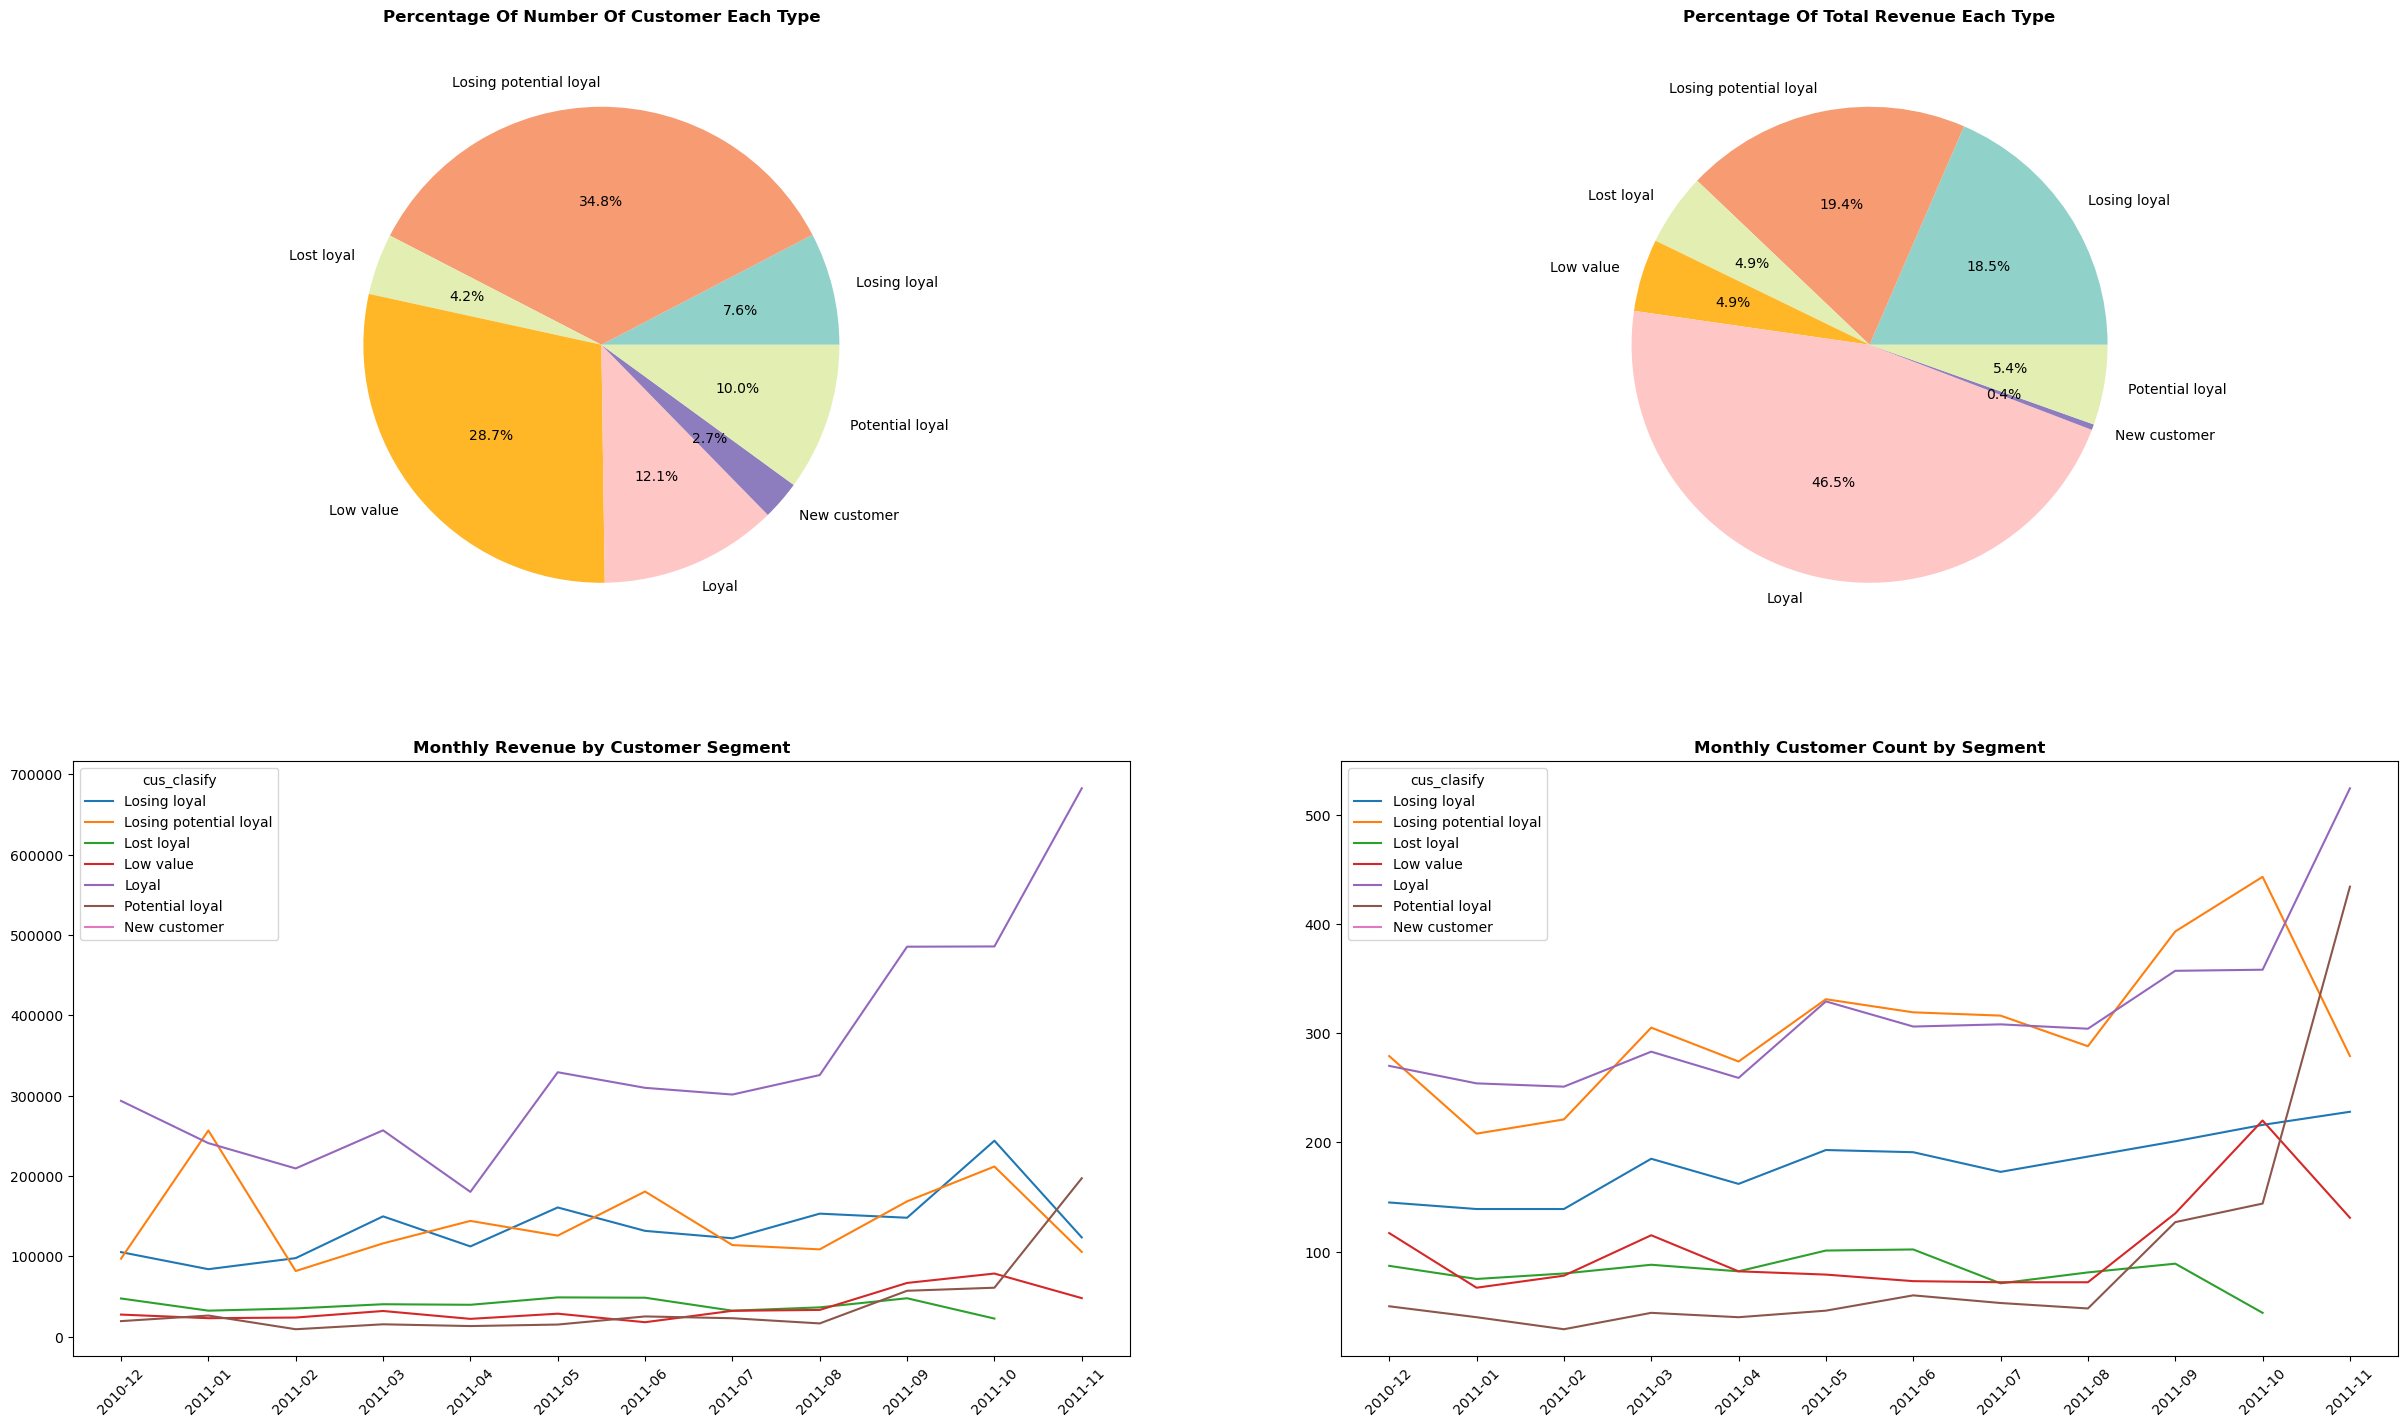

In [61]:
dfplot8 = dfplot.groupby('cus_clasify').agg(
    total_amount = ('amount', 'sum'),
    number_cus=('cust_id', 'nunique')
).reset_index()
dfplot9 = dfplot.groupby(['Year_Month','cus_clasify']).agg(
    total_amount = ('amount', 'sum'),
    number_cus=('cust_id', 'nunique')
).reset_index()

plt.figure(figsize=(30,17))
plt.subplot(2,2,1)
plt.pie(
    x = dfplot8['number_cus'],
    autopct = '%1.1f%%',
    labels = dfplot8['cus_clasify'],
    colors = ["#90D1CA","#F79B72","#E3EEB2","#ffb627","#FFC6C6", "#8E7DBE", "#E3EEB2"]
)
plt.title('Percentage of number of customer each type\n'.title(), fontsize = 12, weight = 'bold')
plt.subplot(2,2,2)
plt.pie(
    x = dfplot8['total_amount'],
    autopct = '%1.1f%%',
    labels = dfplot8['cus_clasify'],
    colors = ["#90D1CA","#F79B72","#E3EEB2","#ffb627","#FFC6C6", "#8E7DBE", "#E3EEB2"]
)
plt.title('Percentage of total revenue each type\n'.title(),fontsize = 12, weight = 'bold')

plt.subplot(2,2,3)
sns.lineplot(
    data=dfplot9,
    x= 'Year_Month',
    y = 'total_amount',
    hue = 'cus_clasify',
)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly Revenue by Customer Segment', loc='center', fontsize = 12, weight = 'bold')
plt.subplot(2,2,4)
sns.lineplot(
    data=dfplot9,
    x= 'Year_Month',
    y = 'number_cus',
    hue = 'cus_clasify'
)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly Customer Count by Segment', loc ='center', fontsize = 12, weight = 'bold')

**Nh·∫≠n x√©t:**
**1. T·ªïng quan ph√¢n kh√∫c kh√°ch h√†ng**
Doanh thu cao nh·∫•t ƒë·∫øn t·ª´ nh√≥m Loyal m·∫∑c d√π s·ªë l∆∞·ª£ng kh√°ch c·ªßa nh√≥m n√†y kh√¥ng ph·∫£i nhi·ªÅu nh·∫•t. ƒêi·ªÅu n√†y cho th·∫•y gi√° tr·ªã trung b√¨nh tr√™n m·ªói kh√°ch h√†ng (ARPU) ·ªü nh√≥m Loyal l√† r·∫•t cao.

Lost loyal v√† Losing loyal l√† hai nh√≥m c√≥ quy m√¥ kh√°ch h√†ng r·∫•t l·ªõn, ƒë·∫∑c bi·ªát l√† nh√≥m Lost loyal. ƒê√¢y l√† m·ªôt kho kh√°ch h√†ng t·ª´ng trung th√†nh nh∆∞ng ƒë√£ r·ªùi ƒëi ‚Äì n·∫øu t√°i k√≠ch ho·∫°t ƒë∆∞·ª£c nh√≥m n√†y, doanh thu c√≥ th·ªÉ tƒÉng m·∫°nh.

Trong khi ƒë√≥, New customer v√† Potential loyal c√≥ s·ªë l∆∞·ª£ng r·∫•t √≠t, v√† doanh thu ƒë√≥ng g√≥p g·∫ßn nh∆∞ kh√¥ng ƒë√°ng k·ªÉ ‚Üí Cho th·∫•y Marketing ƒëang kh√¥ng thu h√∫t ƒë∆∞·ª£c kh√°ch h√†ng m·ªõi, ho·∫∑c kh√°ch h√†ng m·ªõi c√≥ ch·∫•t l∆∞·ª£ng th·∫•p.

**2. Doanh thu theo th·ªùi gian theo t·ª´ng ph√¢n kh√∫c**
Nh√≥m Loyal tƒÉng tr∆∞·ªüng r·∫•t t·ªët c·∫£ v·ªÅ doanh thu l·∫´n xu h∆∞·ªõng ƒë·ªÅu ƒë·∫∑n theo th√°ng. ƒê√¢y l√† ƒëi·ªÉm s√°ng ƒë√°ng kh√≠ch l·ªá.

Losing loyal c≈©ng ƒëang tƒÉng v·ªÅ doanh thu, nh∆∞ng ƒë√¢y l·∫°i l√† t√≠n hi·ªáu ƒë√°ng b√°o ƒë·ªông, v√¨ kh√°ch ƒëang c√≥ xu h∆∞·ªõng gi·∫£m t∆∞∆°ng t√°c v√† r·ªùi ƒëi ‚Üí c·∫ßn chuy·ªÉn h√≥a h·ªç v·ªÅ nh√≥m Loyal c√†ng s·ªõm c√†ng t·ªët.

Lost loyal c√≥ m·ªôt s·ªë th√°ng quay l·∫°i mua h√†ng, nh∆∞ng sau ƒë√≥ bi·∫øn m·∫•t ho√†n to√†n t·ª´ th√°ng 11/2011 ‚Üí C√≥ th·ªÉ ƒë√£ ‚Äúch·∫øt h·∫≥n‚Äù ho·∫∑c b·ªã r∆°i v√†o nh√≥m Low value.

Nh√≥m New customer g·∫ßn nh∆∞ kh√¥ng t·∫°o ra doanh thu ‚Üí Ph·∫£n √°nh Marketing g·∫ßn nh∆∞ t√™ li·ªát.

**3. S·ªë l∆∞·ª£ng kh√°ch h√†ng theo th·ªùi gian**
S·ªë l∆∞·ª£ng kh√°ch Loyal v√† Potential loyal ƒëang tƒÉng ‚Äì l√† d·∫•u hi·ªáu r·∫•t t√≠ch c·ª±c, ph·∫£n √°nh chƒÉm s√≥c kh√°ch h√†ng hi·ªán t·∫°i ƒëang l√†m t·ªët.

Lost loyal bi·∫øn m·∫•t ho√†n to√†n sau th√°ng 11/2011, nh∆∞ ·ªü bi·ªÉu ƒë·ªì tr√™n.

S·ªë l∆∞·ª£ng kh√°ch h√†ng m·ªõi (New customer) r·∫•t √≠t, g·∫ßn nh∆∞ kh√¥ng thay ƒë·ªïi trong c·∫£ nƒÉm ‚Üí c·∫£nh b√°o nghi√™m tr·ªçng v·ªÅ vi·ªác kh√¥ng m·ªü r·ªông th·ªã ph·∫ßn m·ªõi.

**B√™n c·∫°nh ƒë√≥**, t·ª∑ l·ªá chuy·ªÉn ƒë·ªïi t·ª´ kh√°ch ti·ªÅm nƒÉng ‚Üí Loyal ƒëang ho·∫°t ƒë·ªông t·ªët, nh∆∞ng l·∫°i kh√¥ng c√≥ ngu·ªìn kh√°ch m·ªõi ƒë·ªÉ nu√¥i funnel ‚Üí funnel ƒëang b·ªã "c·∫°n ki·ªát ƒë·∫ßu v√†o".

Losing loyal ƒëang tƒÉng ‚Üí ch·ª©ng t·ªè n·ªôi dung/∆∞u ƒë√£i gi·ªØ ch√¢n kh√°ch h√†ng hi·ªán t·∫°i c√≥ th·ªÉ ƒëang xu·ªëng c·∫•p ho·∫∑c ch∆∞a ƒë∆∞·ª£c c√° nh√¢n h√≥a ƒë·ªß.

M·ªôt ph·∫ßn Lost loyal c√≥ th·ªÉ ƒëang r∆°i v√†o nh√≥m Low value thay v√¨ quay v·ªÅ Loyal ‚Üí c·∫ßn ki·ªÉm tra th√™m d·ªØ li·ªáu chi ti·∫øt h√†nh vi.

**Khuy·∫øn ngh·ªã**:
- T√°i k√≠ch ho·∫°t nh√≥m Lost loyal v√† Losing loyal:

G·ª≠i email chƒÉm s√≥c l·∫°i, ∆∞u ƒë√£i ri√™ng cho nh√≥m n√†y.

Ph√¢n t√≠ch l√Ω do r·ªùi b·ªè (gi√°, d·ªãch v·ª•, kh√¥ng ƒë∆∞·ª£c chƒÉm s√≥c...).

- TƒÉng ƒë·∫ßu v√†o kh√°ch h√†ng m·ªõi:

C·∫ßn ƒë·∫©y m·∫°nh k√™nh Marketing online, n·ªôi dung h∆∞·ªõng t·ªõi nh√≥m kh√°ch h√†ng m·ªõi.

Xem x√©t l·∫°i lead generation funnel ƒëang t·∫Øc ·ªü ƒë√¢u.

- Ph√¢n b·ªï ng√¢n s√°ch t·∫≠p trung v√†o nh√≥m ti·ªÅm nƒÉng nh·∫•t (Loyal & Potential loyal):

∆Øu ƒë√£i theo c·∫•p ƒë·ªô trung th√†nh.

K·∫øt h·ª£p referral ƒë·ªÉ ch√≠nh kh√°ch h√†ng loyal k√©o th√™m kh√°ch m·ªõi.


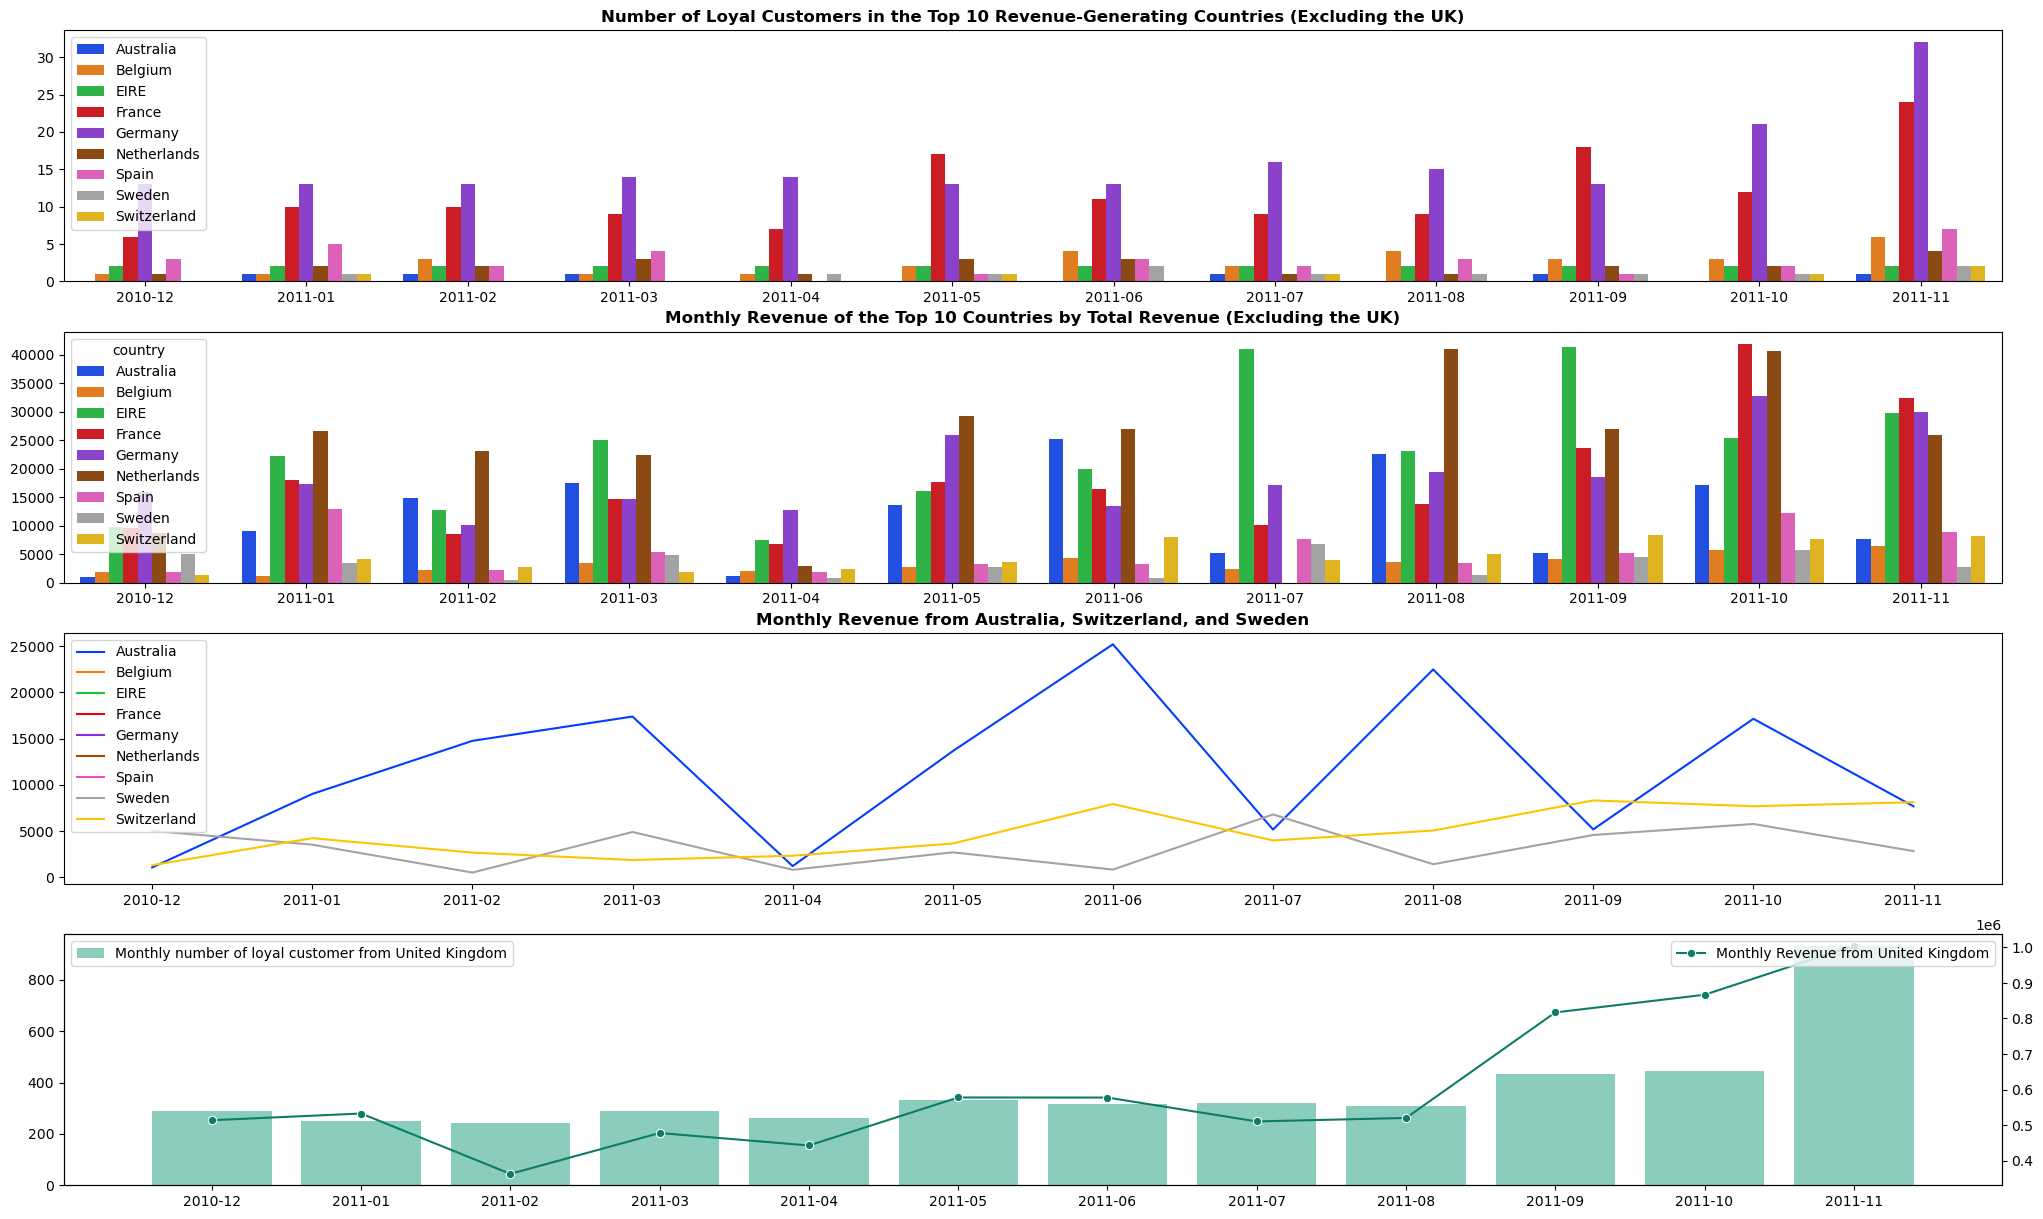

In [ ]:
dfplot10 = dfplot.loc[
    dfplot['country'].isin([
        'Sweden', 'Australia', 'Belgium', 'France', 'Germany','France',
        'Spain','Spain','EIRE','Switzerland', 'Belgium', 'Netherlands'])
    ].groupby(['Year_Month', 'country'])['amount'].sum().reset_index()
dfplot12 = dfplot.loc[
    dfplot['country'].isin([
        'Sweden', 'Australia','Switzerland'])
    ].groupby(['Year_Month', 'country'])['amount'].sum().reset_index()
dfplot11 = dfplot.loc[
    (dfplot['cus_clasify'] == 'Loyal') &
    (dfplot['country'].isin([
        'Sweden', 'Australia', 'Belgium', 'France',
        'Germany', 'Spain', 'EIRE', 'Switzerland', 'Netherlands'
    ]))
].groupby(['Year_Month', 'country'])['cust_id'].nunique().reset_index()
dfplot13 = dfplot.loc[
    dfplot['country']== 'United Kingdom'].groupby(['Year_Month', 'country'])['amount'].sum().reset_index()
dfplot14= dfplot.loc[
    (dfplot['cus_clasify'] == 'Loyal') &
    (dfplot['country'] == 'United Kingdom')].groupby('Year_Month')['cust_id'].nunique().reset_index()
# 1. T·∫°o danh s√°ch c√°c qu·ªëc gia duy nh·∫•t
countries = sorted(list(set(dfplot10['country'].unique()).union(set(dfplot11['country'].unique()))))

# 2. T·∫°o m·ªôt b·∫£ng m√†u c·ªë ƒë·ªãnh cho t·ª´ng qu·ªëc gia
palette = dict(zip(countries, sns.color_palette("tab20", n_colors=len(countries))))

plt.figure(figsize=(25,15))

plt.subplot(4,1,1)
sns.barplot(
    data=dfplot11,
    x= 'Year_Month',
    y = 'cust_id',
    hue = 'country',
    palette='bright',
    hue_order=countries
)
plt.title('Number of Loyal Customers in the Top 10 Revenue-Generating Countries (Excluding the UK)', weight = 'bold')
plt.xlabel('')
plt.ylabel('')

plt.legend(loc='upper left')
plt.subplot(4,1,2)
sns.barplot(
    data=dfplot10,
    x= 'Year_Month',
    y = 'amount',
    hue = 'country',
    palette='bright',
    hue_order=countries
)
plt.title('Monthly Revenue of the Top 10 Countries by Total Revenue (Excluding the UK)', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.subplot(4,1,3)
sns.lineplot(
    data=dfplot12,
    x= 'Year_Month',
    y = 'amount',
    hue = 'country',
    palette='bright',
    hue_order=countries
)
plt.title('Monthly Revenue from Australia, Switzerland, and Sweden', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
sns.barplot(
    data= dfplot14,
    x='Year_Month',
    y = 'cust_id',
    color = '#80D8C3',
    label = 'Monthly number of loyal customer from United Kingdom'
)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc=2)
plt.twinx()
sns.lineplot(
    data=dfplot13,
    x= 'Year_Month',
    y = 'amount',
    color = '#0D7C66',
    marker = 'o',
    label = 'Monthly Revenue from United Kingdom'
)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc=1)

**Nh·∫≠n x√©t**:
- Nh√¨n v√†o bi·ªÉu ƒë·ªì, c√≥ th·ªÉ th·∫•y r·∫±ng nh·ªØng qu·ªëc gia c√≥ l∆∞·ª£ng kh√°ch h√†ng thu·ªôc nh√≥m Loyal ·ªïn ƒë·ªãnh nh∆∞ Ph√°p v√† ƒê·ª©c th∆∞·ªùng c√≥ doanh thu kh√° ·ªïn ƒë·ªãnh v√† ƒë·ªÅu ƒë·∫∑n theo th·ªùi gian. ƒêi·ªÅu n√†y cho th·∫•y m·ªëi li√™n h·ªá ch·∫∑t ch·∫Ω gi·ªØa t·ª∑ l·ªá kh√°ch h√†ng trung th√†nh v√† m·ª©c doanh thu b·ªÅn v·ªØng.

- Ng∆∞·ª£c l·∫°i, c√°c qu·ªëc gia nh∆∞ √öc, Sweden v√† Switzerland tuy ƒë·∫°t doanh thu t·ªët trong m·ªôt s·ªë th·ªùi ƒëi·ªÉm, nh∆∞ng l·∫°i c√≥ d·∫•u hi·ªáu gi·∫£m nh·∫π doanh thu trong nh·ªØng th√°ng cu·ªëi nƒÉm ‚Äî giai ƒëo·∫°n m√† h·∫ßu h·∫øt c√°c qu·ªëc gia kh√°c l·∫°i ghi nh·∫≠n m·ª©c tƒÉng tr∆∞·ªüng. Nguy√™n nh√¢n c√≥ th·ªÉ l√† do l∆∞·ª£ng kh√°ch h√†ng trung th√†nh t·∫°i c√°c qu·ªëc gia n√†y c√≤n kh√° h·∫°n ch·∫ø, khi·∫øn cho doanh thu kh√≥ duy tr√¨ khi kh√¥ng c√≥ chi·∫øn d·ªãch th√∫c ƒë·∫©y c·ª• th·ªÉ ho·∫∑c l∆∞·ª£ng kh√°ch h√†ng m·ªõi kh√¥ng ƒë·ªß b√π ƒë·∫Øp.

**Khuy·∫øn ngh·ªã:**
- C·ªßng c·ªë v√† m·ªü r·ªông t·ªáp kh√°ch h√†ng Loyal t·∫°i c√°c th·ªã tr∆∞·ªùng ƒëang suy gi·∫£m:

Tri·ªÉn khai c√°c ch∆∞∆°ng tr√¨nh gi·ªØ ch√¢n ri√™ng bi·ªát t·∫°i Australia, Sweden, Switzerland: ∆∞u ƒë√£i gia h·∫°n, combo quay l·∫°i, khuy·∫øn m√£i c√° nh√¢n h√≥a theo h√†nh vi.

G·ª≠i survey cho kh√°ch h√†ng ƒë√£ mua ƒë·ªÉ x√°c ƒë·ªãnh nguy√™n nh√¢n r·ªùi ƒëi, t·ª´ ƒë√≥ ƒëi·ªÅu ch·ªânh s·∫£n ph·∫©m/d·ªãch v·ª• ph√π h·ª£p.

- X√¢y d·ª±ng chi·∫øn d·ªãch gi·ªØ ch√¢n kh√°ch h√†ng ph√π h·ª£p theo t·ª´ng khu v·ª±c:

Ph√°p & ƒê·ª©c n√™n ti·∫øp t·ª•c duy tr√¨ nh√≥m kh√°ch h√†ng trung th√†nh th√¥ng qua ch∆∞∆°ng tr√¨nh h·ªôi vi√™n, quy·ªÅn l·ª£i n√¢ng c·∫•p theo c·∫•p ƒë·ªô mua s·∫Øm.

D√†nh ng√¢n s√°ch qu·∫£ng c√°o l·∫°i (retargeting) cho nh√≥m kh√°ch t·ª´ng mua nh∆∞ng kh√¥ng quay l·∫°i trong 3‚Äì6 th√°ng g·∫ßn ƒë√¢y t·∫°i c√°c th·ªã tr∆∞·ªùng ƒëang s·ª•t gi·∫£m.

- T·ªëi ∆∞u c√°c qu·ªëc gia c√≥ doanh thu t·ªët nh∆∞ng ch∆∞a ·ªïn ƒë·ªãnh:

√Åp d·ª•ng m√¥ h√¨nh chƒÉm s√≥c kh√°ch h√†ng nh∆∞ t·∫°i Ph√°p v√† ƒê·ª©c cho c√°c n∆∞·ªõc nh∆∞ √öc, n·∫øu h√†nh vi ti√™u d√πng t∆∞∆°ng ƒë·ªìng.

∆Øu ti√™n ƒëo l∆∞·ªùng v√† theo d√µi ch·ªâ s·ªë chuy·ªÉn ƒë·ªïi t·ª´ ‚Äúkh√°ch h√†ng m·ªõi‚Äù sang ‚ÄúLoyal‚Äù t·∫°i t·ª´ng th·ªã tr∆∞·ªùng ƒë·ªÉ x√°c ƒë·ªãnh bottleneck.

## **K·∫æT LU·∫¨N:**
**1. Hi·ªáu su·∫•t theo m√πa & h√†nh vi ti√™u d√πng**

- Doanh nghi·ªáp c√≥ m√πa cao ƒëi·ªÉm r√µ r·ªát v√†o cu·ªëi nƒÉm (t·ª´ th√°ng 9‚Äì12) do tr√πng c√°c d·ªãp l·ªÖ v√† khuy·∫øn m·∫°i l·ªõn. L∆∞·ª£ng ƒë∆°n h√†ng tƒÉng m·∫°nh t·ª´ th√°ng 9, ƒë·∫∑c bi·ªát nh·ªù kh√°ch s·ªâ ch·ªß ƒë·ªông ƒë·∫∑t s·ªõm.

- Doanh thu kh√¥ng lu√¥n t·ª∑ l·ªá thu·∫≠n v·ªõi s·ªë ƒë∆°n h√†ng: Th√°ng 1 c√≥ √≠t ƒë∆°n nh∆∞ng AOV cao nh·∫•t; th√°ng 11 nhi·ªÅu ƒë∆°n nh·∫•t nh∆∞ng AOV th·∫•p do khuy·∫øn m√£i m·∫°nh.

- Kh√°ch mua nhi·ªÅu v√†o gi·ªù tr∆∞a (10h‚Äì13h) v√† gi·ªØa tu·∫ßn (Th·ª© 4, 5). M·ªôt s·ªë khung gi·ªù √≠t ng∆∞·ªùi nh∆∞ng AOV r·∫•t cao (7h s√°ng, 20h t·ªëi) c√≥ th·ªÉ l√† kh√°ch s·ªâ ho·∫∑c VIP.

‚úÖ Khuy·∫øn ngh·ªã:
L√™n k·∫ø ho·∫°ch nh·∫≠p h√†ng t·ª´ th√°ng 8‚Äì9.

T·ªëi ∆∞u khung gi·ªù qu·∫£ng c√°o v√† ho·∫°t ƒë·ªông b√°n h√†ng tr·ª±c ti·∫øp (livestream, email, push).

K·∫øt h·ª£p c√°c h√¨nh th·ª©c khuy·∫øn m√£i th√¥ng minh (mua nhi·ªÅu gi·∫£m s√¢u, t·∫∑ng k√®m, freeship theo ng∆∞·ª°ng).

**2. Th·ªã tr∆∞·ªùng v√† ƒë·ªãa l√Ω**

- UK chi·∫øm 80%+ doanh thu, t·∫°o ra r·ªßi ro l·ªõn n·∫øu th·ªã tr∆∞·ªùng bi·∫øn ƒë·ªông.

- C√°c qu·ªëc gia nh∆∞ Netherlands, EIRE, Australia c√≥ AOV cao, d√π kh√¥ng c√≥ nhi·ªÅu ƒë∆°n.

- Japan, Singapore, Brazil l√† th·ªã tr∆∞·ªùng m·ªõi n·ªïi v·ªõi kh√°ch h√†ng ‚Äúch·ªãu chi‚Äù.

- France & Germany c√≥ t·∫≠p kh√°ch h√†ng trung th√†nh ·ªïn ƒë·ªãnh, doanh thu ƒë·ªÅu.

- Australia, Sweden, Switzerland c√≥ doanh thu t·ªët nh∆∞ng ƒëang ch·ªØng l·∫°i do thi·∫øu kh√°ch loyal.

‚úÖ Khuy·∫øn ngh·ªã:
- ƒêa d·∫°ng h√≥a th·ªã tr∆∞·ªùng, m·ªü r·ªông sang ch√¢u √Å, ch√¢u M·ªπ.

- ƒê·∫ßu t∆∞ chƒÉm s√≥c nh√≥m kh√°ch AOV cao b·∫±ng loyalty, ∆∞u ƒë√£i theo c·∫•p.

- Duy tr√¨ retargeting ·ªü Ph√°p/ƒê·ª©c; √°p d·ª•ng m√¥ h√¨nh chƒÉm s√≥c sang √öc v√† c√°c n∆∞·ªõc t∆∞∆°ng t·ª±.

- T√πy bi·∫øn chi·∫øn l∆∞·ª£c ti·∫øp c·∫≠n t·ª´ng qu·ªëc gia d·ª±a v√†o h√†nh vi ti√™u d√πng.

**3. Ph√¢n kh√∫c kh√°ch h√†ng (RFM v√† Cohort)**

- Loyal l√† nh√≥m ƒëem l·∫°i doanh thu cao nh·∫•t d√π kh√¥ng ƒë√¥ng nh·∫•t ‚Üí ARPU r·∫•t cao.

- Losing loyal & Lost loyal c√≥ quy m√¥ l·ªõn ‚Üí c·∫ßn kh·∫©n c·∫•p t√°i k√≠ch ho·∫°t.

- New & Potential loyal r·∫•t √≠t ‚Üí Marketing ch∆∞a hi·ªáu qu·∫£, funnel ƒë·∫ßu v√†o "c·∫°n".

- Nh√≥m kh√°ch h√†ng m·ªõi t·ª´ Dec 2010 duy tr√¨ ti√™u d√πng t·ªët trong c·∫£ nƒÉm ‚Üí kh·∫£ nƒÉng chuy·ªÉn h√≥a cao.

- T·ª∑ l·ªá chuy·ªÉn ƒë·ªïi t·ª´ Potential ‚Üí Loyal ƒëang ho·∫°t ƒë·ªông t·ªët, nh∆∞ng kh√¥ng ƒë·ªß ngu·ªìn ƒë·∫ßu v√†o nu√¥i funnel.

‚úÖ Khuy·∫øn ngh·ªã:
- T√°i k√≠ch ho·∫°t nh√≥m Lost/Losing loyal b·∫±ng ch∆∞∆°ng tr√¨nh chƒÉm s√≥c & ∆∞u ƒë√£i ri√™ng.

- TƒÉng t·ªáp kh√°ch m·ªõi qua c√°c chi·∫øn d·ªãch lead gen, referral, combo th·ª≠, ‚Äúgi·∫£m cho ƒë∆°n ƒë·∫ßu ti√™n‚Äù.

- Ph√¢n b·ªï ng√¢n s√°ch ∆∞u ti√™n nh√≥m Loyal & Potential loyal ƒë·ªÉ tƒÉng doanh thu b·ªÅn v·ªØng.

- X√¢y d·ª±ng loyalty program theo c·∫•p b·∫≠c (Silver ‚Äì Gold ‚Äì VIP), t√≠ch ƒëi·ªÉm ‚Äì t·∫∑ng qu√†.

**4. K·∫æT LU·∫¨N CHI·∫æN L∆Ø·ª¢C**

- C√¥ng ty ƒë√£ c√≥ t·ªáp kh√°ch trung th√†nh m·∫°nh, l√† n·ªÅn t·∫£ng v·ªØng ch·∫Øc cho tƒÉng tr∆∞·ªüng d√†i h·∫°n.

- Tuy nhi√™n, ph·ª• thu·ªôc v√†o kh√°ch c≈© v√† th·ªã tr∆∞·ªùng UK qu√° nhi·ªÅu khi·∫øn r·ªßi ro cao n·∫øu h√†nh vi ti√™u d√πng thay ƒë·ªïi.

- ƒê·ªÉ tƒÉng tr∆∞·ªüng b·ªÅn v·ªØng, c·∫ßn song song m·ªü r·ªông kh√°ch h√†ng m·ªõi, th·ªã tr∆∞·ªùng m·ªõi v√† gi·ªØ ch√¢n nh√≥m kh√°ch gi√° tr·ªã cao.

- C√°c ph√¢n t√≠ch theo th·ªùi gian, qu·ªëc gia v√† ph√¢n kh√∫c ƒë·ªÅu cho th·∫•y c·∫ßn chi·∫øn l∆∞·ª£c c√° nh√¢n h√≥a s√¢u h∆°n, theo d√µi theo th·ªùi gian v√† ph·∫£n ·ª©ng k·ªãp th·ªùi theo h√†nh vi ti√™u d√πng.